In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# 컬럼 수가 많으므로 요약되어 표시되지 않게 하는 함수
pd.set_option('display.max_columns', None)

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')

train.drop(['id'], axis = 1, inplace = True)
test.drop(['id'], axis = 1, inplace = True)

train.shape, test.shape, submission.shape

((3000, 23), (2000, 22), (2000, 2))

In [2]:
train.drop('Departure Delay in Minutes', axis = 1, inplace = True)
train.drop('Food and drink', axis = 1, inplace = True)

test.drop('Departure Delay in Minutes', axis = 1, inplace = True)
test.drop('Food and drink', axis = 1, inplace = True)

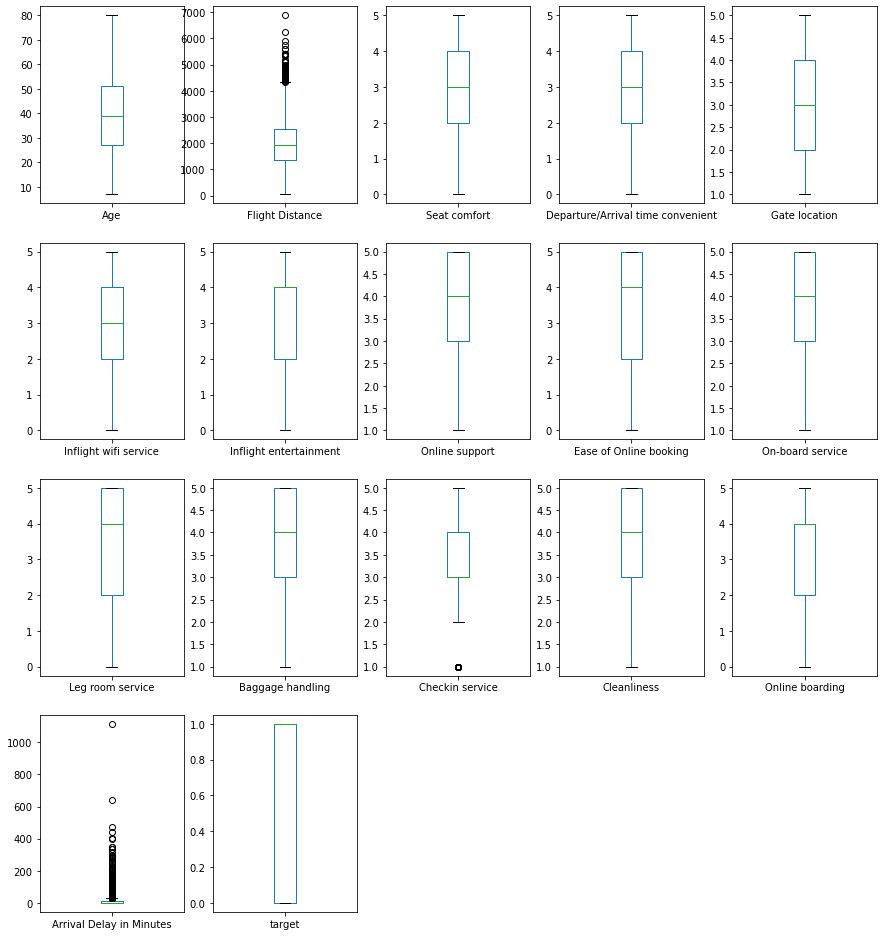

In [3]:
train.plot(kind = 'box', subplots = True, layout = (5, 5), figsize = (15, 21))
plt.show()

- 출발/도착 지연시간과 비행시간에 대해서 이상치가 매우 많음

In [4]:
# 이상치 제거

def outliers(data):
    q1, q3 = np.percentile(data, [25, 75])
    
    iqr = q3 - q1
    lower_bound = q1 - (iqr * 1.5)
    upper_bound = q3 + (iqr * 1.5)
    
    return np.where((data > upper_bound) | (data < lower_bound))

In [5]:
ArrivalDelay_index_data = outliers(train['Arrival Delay in Minutes'])[0]
FlightDistance_index_data = outliers(train['Flight Distance'])[0]
CheckinService_index_data = outliers(train['Checkin service'])[0]

In [6]:
ArrivalDelay_index_data

array([   6,   23,   30,   35,   36,   51,   57,   59,   62,   66,   78,
         82,   85,   92,  116,  134,  137,  151,  160,  162,  175,  180,
        198,  202,  206,  214,  245,  255,  258,  279,  283,  285,  290,
        292,  303,  309,  315,  325,  335,  340,  341,  349,  359,  368,
        373,  375,  377,  385,  391,  394,  416,  428,  429,  435,  454,
        457,  472,  483,  484,  490,  510,  511,  517,  522,  537,  539,
        573,  575,  587,  592,  599,  604,  620,  621,  623,  627,  638,
        641,  650,  652,  653,  670,  672,  676,  693,  695,  696,  703,
        707,  715,  721,  723,  737,  752,  763,  766,  773,  774,  783,
        792,  797,  798,  799,  809,  810,  824,  837,  846,  852,  858,
        862,  869,  883,  884,  895,  904,  906,  912,  923,  937,  947,
        948,  949,  962,  968,  978,  983,  987,  993, 1001, 1002, 1013,
       1014, 1020, 1027, 1031, 1034, 1044, 1065, 1068, 1069, 1073, 1074,
       1098, 1103, 1116, 1122, 1140, 1151, 1152, 11

- 행 자체를 삭제하려고 보니 이상치가 포함된 행이 너무 많아 학습에 지장이 생길 듯함. 제거가 아닌 평균값으로 대치함.

In [7]:
train.loc[ArrivalDelay_index_data, 'Arrival Delay in Minutes'] = train['Arrival Delay in Minutes'].mean()
train.loc[FlightDistance_index_data, 'Flight Distance'] = train['Flight Distance'].mean()
train.loc[CheckinService_index_data, 'Checkin service'] = train['Checkin service'].mean()

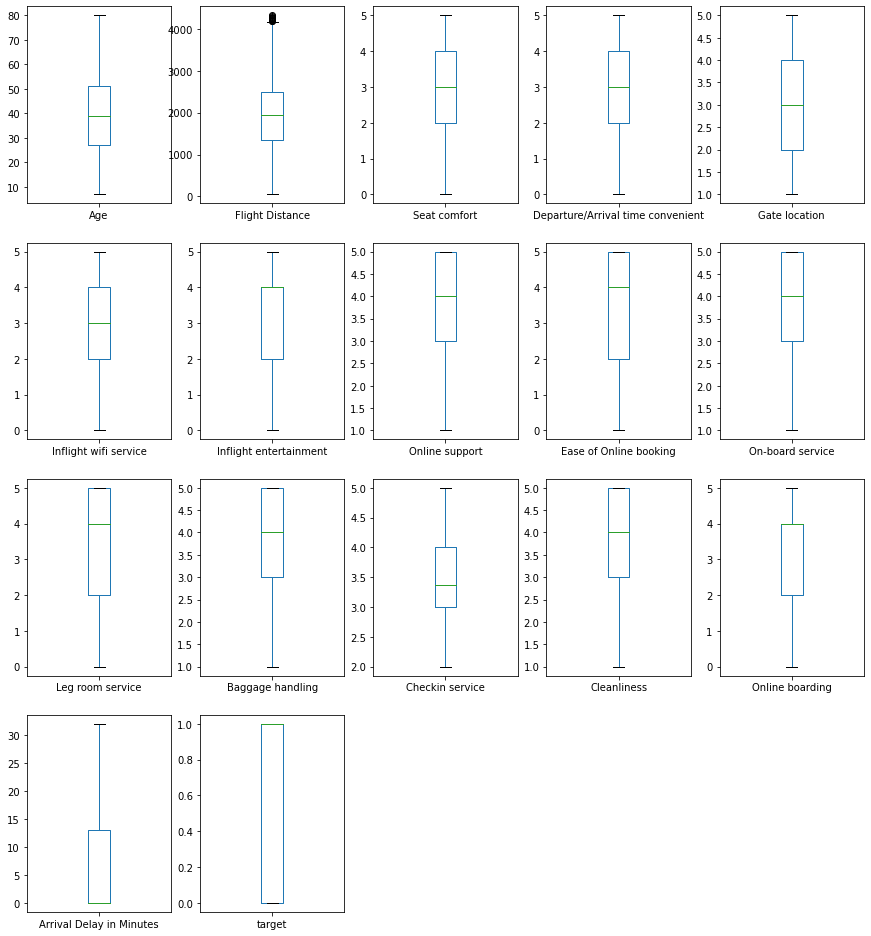

In [8]:
train.plot(kind = 'box', subplots = True, layout = (5, 5), figsize = (15, 21))
plt.show()

In [9]:
train.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Arrival Delay in Minutes,target
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000
mean,39.203000,1926.522534,2.863333,3.009667,3.016667,3.259667,3.352333,3.50500,3.488000,3.497000,3.485000,3.728667,3.63386,3.728667,3.356333,5.650137,0.556000
std,15.108802,940.056241,1.394981,1.519543,1.294713,1.322683,1.352826,1.31068,1.302211,1.283436,1.294218,1.154190,0.94221,1.161678,1.294057,8.067849,0.496937
min,7.000000,52.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.00000,0.000000,1.000000,0.000000,1.000000,2.00000,1.000000,0.000000,0.000000,0.000000
25%,27.000000,1348.250000,2.000000,2.000000,2.000000,2.000000,2.000000,3.00000,2.000000,3.000000,2.000000,3.000000,3.00000,3.000000,2.000000,0.000000,0.000000
50%,39.000000,1937.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,3.37000,4.000000,4.000000,0.000000,1.000000
75%,51.000000,2483.250000,4.000000,4.000000,4.000000,4.000000,4.000000,5.00000,5.000000,5.000000,5.000000,5.000000,4.00000,5.000000,4.000000,13.000000,1.000000
max,80.000000,4321.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,32.000000,1.000000


In [10]:
categorical_features = train.select_dtypes(include = 'object').columns

from sklearn.preprocessing import LabelEncoder

for col in categorical_features:
    le = LabelEncoder()
    train[col] = le.fit_transform(train[col])
    test[col] = le.transform(test[col])

In [11]:
train.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Arrival Delay in Minutes,target
0,0,1,22,0,1,1599.0,3,0,3,4,3,4,4,5,4,4,4.00,5,4,0.0,0
1,0,0,37,0,0,2810.0,2,4,4,1,4,3,5,5,4,2,3.37,5,2,18.0,0
2,1,0,46,0,0,2622.0,1,1,1,4,5,5,4,4,4,4,5.00,4,3,0.0,1
3,0,1,24,0,1,2348.0,3,3,3,3,3,3,3,2,4,5,3.00,4,3,2.0,0
4,0,0,58,0,0,105.0,3,3,3,4,4,5,4,4,4,4,4.00,4,5,0.0,1


In [12]:
import optuna
from optuna import Trial, visualization
from optuna.samplers import TPESampler

from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

In [13]:
def accuracy(true, pred):
    score = np.mean(true == pred)
    return score

In [14]:
X = train.drop(['target'], axis = 1)
y = train['target']

In [15]:
X = np.array(X)
y = np.array(y)
test = np.array(test)

In [16]:
from sklearn.model_selection import train_test_split

X_tr, X_val, y_tr, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_tr.shape , X_val.shape, y_tr.shape, y_val.shape

((2400, 20), (600, 20), (2400,), (600,))

In [17]:
def xgb_objective(trial : Trial, X, y, test):
    
    params = {
        'num_iterations' : trial.suggest_int('num_iterations', 100, 1000),
        'n_estimators' : trial.suggest_int('n_estimators', 100, 1000),
        'max_depth' : trial.suggest_int('max_depth', 1, 10),
        'min_child_weight' : trial.suggest_int('min_child_weight', 1, 25),
        'gamma' : trial.suggest_int('gamma', 0, 16),
        'learning_rate' : trial.suggest_uniform('learning_rate', 0.001, 0.1),
        'colsample_bytree' : trial.suggest_float('colsample_bytree', 0, 1),
        'colsample_bylevel' : trial.suggest_float('colsample_bylevel', 0, 1),
        'colsample_bynode' : trial.suggest_float('colsample_bynode', 0, 1),
        'reg_lambda' : trial.suggest_loguniform('reg_lambda', 1e-8, 30),
        'reg_alpha' : trial.suggest_loguniform('reg_alpha', 1e-8, 30),
        'subsample' : trial.suggest_categorical('subsample', [0.5, 0.6, 0.7, 0.8, 1.0]),
        'random_state' : 42,
        'early_stopping' : 200
    }
    
    model = XGBClassifier(**params)
    xgb_model = model.fit(X_tr, y_tr, verbose = 0)
    pred_xgb = xgb_model.predict(X_val)
    score = accuracy(y_val, pred_xgb)
    return score

In [18]:
xgb_study = optuna.create_study(direction = 'maximize')
xgb_study.optimize(lambda trial : xgb_objective(trial, X_tr, y_tr, X_val), n_trials = 50)
print('Best trial : Score {}, \nparams {}'.format(xgb_study.best_trial.value, xgb_study.best_trial.params))

[I 2022-02-10 18:20:22,030] A new study created in memory with name: no-name-0e7ab35c-45c8-45d7-9d3d-86f3cc7df115


[18:20:22] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { early_stopping, num_iterations } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-10 18:20:22,381] Trial 0 finished with value: 0.8666666666666667 and parameters: {'num_iterations': 462, 'n_estimators': 492, 'max_depth': 1, 'min_child_weight': 24, 'gamma': 4, 'learning_rate': 0.03208489674034844, 'colsample_bytree': 0.35190926666364386, 'colsample_bylevel': 0.9346606729080124, 'colsample_bynode': 0.37535830176740637, 'reg_lambda': 0.0012211762026491915, 'reg_alpha': 0.017278498114590105, 'subsample': 0.8}. Best is trial 0 with value: 0.8666666666666667.


[18:20:22] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { early_stopping, num_iterations } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-10 18:20:23,304] Trial 1 finished with value: 0.92 and parameters: {'num_iterations': 546, 'n_estimators': 688, 'max_depth': 5, 'min_child_weight': 13, 'gamma': 14, 'learning_rate': 0.014071110503367255, 'colsample_bytree': 0.7949125692089041, 'colsample_bylevel': 0.776995630039896, 'colsample_bynode': 0.8403790473957625, 'reg_lambda': 0.0544956444791158, 'reg_alpha': 0.008457814347797172, 'subsample': 0.8}. Best is trial 1 with value: 0.92.


[18:20:23] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { early_stopping, num_iterations } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-10 18:20:24,292] Trial 2 finished with value: 0.9183333333333333 and parameters: {'num_iterations': 1000, 'n_estimators': 677, 'max_depth': 10, 'min_child_weight': 5, 'gamma': 13, 'learning_rate': 0.06169732816007618, 'colsample_bytree': 0.6884761206253945, 'colsample_bylevel': 0.028798862948047677, 'colsample_bynode': 0.6474220655622401, 'reg_lambda': 3.6471774948270303e-08, 'reg_alpha': 6.094116466907357e-05, 'subsample': 0.7}. Best is trial 1 with value: 0.92.


[18:20:24] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { early_stopping, num_iterations } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-10 18:20:24,765] Trial 3 finished with value: 0.8583333333333333 and parameters: {'num_iterations': 532, 'n_estimators': 758, 'max_depth': 1, 'min_child_weight': 10, 'gamma': 6, 'learning_rate': 0.02873697036226408, 'colsample_bytree': 0.597451064764159, 'colsample_bylevel': 0.5731584400075153, 'colsample_bynode': 0.24431900124604944, 'reg_lambda': 5.56800862758012, 'reg_alpha': 0.001025646667257093, 'subsample': 0.8}. Best is trial 1 with value: 0.92.


[18:20:24] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { early_stopping, num_iterations } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-10 18:20:25,161] Trial 4 finished with value: 0.87 and parameters: {'num_iterations': 173, 'n_estimators': 514, 'max_depth': 2, 'min_child_weight': 12, 'gamma': 10, 'learning_rate': 0.03893032091209167, 'colsample_bytree': 0.7053888116889452, 'colsample_bylevel': 0.4618339386574607, 'colsample_bynode': 0.32920847922971097, 'reg_lambda': 0.00010699628435399314, 'reg_alpha': 14.889060609091347, 'subsample': 0.6}. Best is trial 1 with value: 0.92.


[18:20:25] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { early_stopping, num_iterations } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-10 18:20:25,612] Trial 5 finished with value: 0.925 and parameters: {'num_iterations': 111, 'n_estimators': 333, 'max_depth': 8, 'min_child_weight': 2, 'gamma': 3, 'learning_rate': 0.04160495082631514, 'colsample_bytree': 0.28567374115290467, 'colsample_bylevel': 0.2434430013800053, 'colsample_bynode': 0.6965889245778399, 'reg_lambda': 1.1012671059770687, 'reg_alpha': 0.046176903553405396, 'subsample': 0.7}. Best is trial 5 with value: 0.925.


[18:20:25] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { early_stopping, num_iterations } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-10 18:20:26,170] Trial 6 finished with value: 0.8633333333333333 and parameters: {'num_iterations': 488, 'n_estimators': 526, 'max_depth': 10, 'min_child_weight': 13, 'gamma': 1, 'learning_rate': 0.008214511219054057, 'colsample_bytree': 0.1842839578715415, 'colsample_bylevel': 0.029195717044859792, 'colsample_bynode': 0.08561128077620206, 'reg_lambda': 9.370995168489069e-07, 'reg_alpha': 0.9249101402923747, 'subsample': 0.5}. Best is trial 5 with value: 0.925.


[18:20:26] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { early_stopping, num_iterations } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-10 18:20:27,147] Trial 7 finished with value: 0.9133333333333333 and parameters: {'num_iterations': 418, 'n_estimators': 974, 'max_depth': 3, 'min_child_weight': 12, 'gamma': 0, 'learning_rate': 0.0230266059442991, 'colsample_bytree': 0.9775288286435084, 'colsample_bylevel': 0.32541887958743754, 'colsample_bynode': 0.5733752530427417, 'reg_lambda': 0.00047587450565911554, 'reg_alpha': 0.00020331024992026412, 'subsample': 0.6}. Best is trial 5 with value: 0.925.


[18:20:27] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { early_stopping, num_iterations } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-10 18:20:27,378] Trial 8 finished with value: 0.9 and parameters: {'num_iterations': 209, 'n_estimators': 171, 'max_depth': 6, 'min_child_weight': 3, 'gamma': 0, 'learning_rate': 0.036138153799840596, 'colsample_bytree': 0.21120896049588656, 'colsample_bylevel': 0.9266283577445559, 'colsample_bynode': 0.5283335075938882, 'reg_lambda': 0.005476377604270063, 'reg_alpha': 0.10350166236514766, 'subsample': 0.5}. Best is trial 5 with value: 0.925.


[18:20:27] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { early_stopping, num_iterations } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-10 18:20:27,771] Trial 9 finished with value: 0.8716666666666667 and parameters: {'num_iterations': 889, 'n_estimators': 291, 'max_depth': 7, 'min_child_weight': 3, 'gamma': 8, 'learning_rate': 0.006453156543509043, 'colsample_bytree': 0.5312641221623581, 'colsample_bylevel': 0.38609529692645417, 'colsample_bynode': 0.40023507122281266, 'reg_lambda': 5.419836691997702e-06, 'reg_alpha': 1.543339023371752, 'subsample': 0.5}. Best is trial 5 with value: 0.925.


[18:20:27] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { early_stopping, num_iterations } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-10 18:20:28,195] Trial 10 finished with value: 0.88 and parameters: {'num_iterations': 751, 'n_estimators': 320, 'max_depth': 8, 'min_child_weight': 20, 'gamma': 4, 'learning_rate': 0.09726679127943955, 'colsample_bytree': 0.011706277536675747, 'colsample_bylevel': 0.20820277068699972, 'colsample_bynode': 0.9185114200340689, 'reg_lambda': 1.6674912468608605, 'reg_alpha': 1.6495899571071506e-07, 'subsample': 0.7}. Best is trial 5 with value: 0.925.


[18:20:28] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { early_stopping, num_iterations } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-10 18:20:29,008] Trial 11 finished with value: 0.9116666666666666 and parameters: {'num_iterations': 691, 'n_estimators': 732, 'max_depth': 4, 'min_child_weight': 18, 'gamma': 16, 'learning_rate': 0.06236792491429553, 'colsample_bytree': 0.9282477796247762, 'colsample_bylevel': 0.6575803984491148, 'colsample_bynode': 0.830885964641241, 'reg_lambda': 0.09457789900605103, 'reg_alpha': 4.09148744097364e-06, 'subsample': 1.0}. Best is trial 5 with value: 0.925.


[18:20:29] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { early_stopping, num_iterations } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-10 18:20:29,572] Trial 12 finished with value: 0.93 and parameters: {'num_iterations': 304, 'n_estimators': 360, 'max_depth': 5, 'min_child_weight': 7, 'gamma': 12, 'learning_rate': 0.06286332835484368, 'colsample_bytree': 0.3712261178405069, 'colsample_bylevel': 0.7370677997106017, 'colsample_bynode': 0.7328594547950074, 'reg_lambda': 0.12741741391103265, 'reg_alpha': 0.011446494257812367, 'subsample': 0.8}. Best is trial 12 with value: 0.93.


[18:20:29] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { early_stopping, num_iterations } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-10 18:20:30,162] Trial 13 finished with value: 0.9266666666666666 and parameters: {'num_iterations': 320, 'n_estimators': 326, 'max_depth': 8, 'min_child_weight': 7, 'gamma': 11, 'learning_rate': 0.08068329417469787, 'colsample_bytree': 0.38162230996044344, 'colsample_bylevel': 0.7362517243951112, 'colsample_bynode': 0.7001927422892833, 'reg_lambda': 0.23823579739820988, 'reg_alpha': 0.12598875646709276, 'subsample': 0.7}. Best is trial 12 with value: 0.93.
[I 2022-02-10 18:20:30,382] Trial 14 finished with value: 0.895 and parameters: {'num_iterations': 274, 'n_estimators': 118, 'max_depth': 6, 'min_child_weight': 7, 'gamma': 11, 'learning_rate': 0.08689255560494133, 'colsample_bytree': 0.4472640655898494, 'colsample_bylevel': 0.7517503478384747, 'colsample_bynode': 0.7378498167024118, 'reg_lambda': 17.324812651475693, 'reg_alpha': 17.91479644919136, 'subsample': 1.0}. Best is trial 12 with value: 0.93.


[18:20:30] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { early_stopping, num_iterations } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:20:30] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { early_stopping, num_iterations } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-10 18:20:31,115] Trial 15 finished with value: 0.9266666666666666 and parameters: {'num_iterations': 335, 'n_estimators': 380, 'max_depth': 8, 'min_child_weight': 7, 'gamma': 10, 'learning_rate': 0.0770192484464996, 'colsample_bytree': 0.40507377265617633, 'colsample_bylevel': 0.8012805729604052, 'colsample_bynode': 0.9392515186820896, 'reg_lambda': 0.07112662155838881, 'reg_alpha': 0.001650122065859959, 'subsample': 0.7}. Best is trial 12 with value: 0.93.


[18:20:31] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { early_stopping, num_iterations } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-10 18:20:31,441] Trial 16 finished with value: 0.8766666666666667 and parameters: {'num_iterations': 352, 'n_estimators': 212, 'max_depth': 4, 'min_child_weight': 8, 'gamma': 13, 'learning_rate': 0.06894985112713592, 'colsample_bytree': 0.06590724902182266, 'colsample_bylevel': 0.6009320556267536, 'colsample_bynode': 0.76950479118447, 'reg_lambda': 0.01385006014252241, 'reg_alpha': 1.532242883243418e-05, 'subsample': 0.8}. Best is trial 12 with value: 0.93.


[18:20:31] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { early_stopping, num_iterations } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-10 18:20:32,149] Trial 17 finished with value: 0.925 and parameters: {'num_iterations': 628, 'n_estimators': 423, 'max_depth': 9, 'min_child_weight': 16, 'gamma': 8, 'learning_rate': 0.052732288159948626, 'colsample_bytree': 0.5235157572262472, 'colsample_bylevel': 0.9849233414337605, 'colsample_bynode': 0.6080321013560693, 'reg_lambda': 0.41548601274679303, 'reg_alpha': 0.2905584918529852, 'subsample': 0.7}. Best is trial 12 with value: 0.93.


[18:20:32] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { early_stopping, num_iterations } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-10 18:20:32,743] Trial 18 finished with value: 0.91 and parameters: {'num_iterations': 377, 'n_estimators': 426, 'max_depth': 5, 'min_child_weight': 9, 'gamma': 16, 'learning_rate': 0.08008184141781237, 'colsample_bytree': 0.15903053790629718, 'colsample_bylevel': 0.8526355789051877, 'colsample_bynode': 0.9933089417117539, 'reg_lambda': 4.349298397579281e-05, 'reg_alpha': 0.0017446999924663191, 'subsample': 0.8}. Best is trial 12 with value: 0.93.


[18:20:32] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { early_stopping, num_iterations } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-10 18:20:33,912] Trial 19 finished with value: 0.93 and parameters: {'num_iterations': 240, 'n_estimators': 640, 'max_depth': 7, 'min_child_weight': 5, 'gamma': 10, 'learning_rate': 0.07086117672485494, 'colsample_bytree': 0.39378377469339054, 'colsample_bylevel': 0.8599775931149254, 'colsample_bynode': 0.9952238331547596, 'reg_lambda': 0.00871781701133457, 'reg_alpha': 3.8689983128738825e-07, 'subsample': 0.6}. Best is trial 12 with value: 0.93.


[18:20:34] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { early_stopping, num_iterations } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-10 18:20:35,273] Trial 20 finished with value: 0.9183333333333333 and parameters: {'num_iterations': 245, 'n_estimators': 855, 'max_depth': 7, 'min_child_weight': 1, 'gamma': 6, 'learning_rate': 0.05180277217208593, 'colsample_bytree': 0.2697922334757518, 'colsample_bylevel': 0.5172982866340076, 'colsample_bynode': 0.8607406219390128, 'reg_lambda': 0.00651771323784767, 'reg_alpha': 2.174194085490206e-08, 'subsample': 0.6}. Best is trial 12 with value: 0.93.


[18:20:35] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { early_stopping, num_iterations } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-10 18:20:36,490] Trial 21 finished with value: 0.9266666666666666 and parameters: {'num_iterations': 115, 'n_estimators': 645, 'max_depth': 7, 'min_child_weight': 5, 'gamma': 10, 'learning_rate': 0.07166107086356131, 'colsample_bytree': 0.43261412822004075, 'colsample_bylevel': 0.8460057982356128, 'colsample_bynode': 0.9970907241219029, 'reg_lambda': 0.028258560354027788, 'reg_alpha': 1.5961950824969966e-06, 'subsample': 0.6}. Best is trial 12 with value: 0.93.


[18:20:36] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { early_stopping, num_iterations } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-10 18:20:37,660] Trial 22 finished with value: 0.9316666666666666 and parameters: {'num_iterations': 109, 'n_estimators': 609, 'max_depth': 7, 'min_child_weight': 5, 'gamma': 9, 'learning_rate': 0.0681409854283227, 'colsample_bytree': 0.45797996501230576, 'colsample_bylevel': 0.6647727415105588, 'colsample_bynode': 0.9920375099346905, 'reg_lambda': 0.0013086793130886992, 'reg_alpha': 7.394651042572558e-07, 'subsample': 0.6}. Best is trial 22 with value: 0.9316666666666666.


[18:20:37] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { early_stopping, num_iterations } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-10 18:20:38,939] Trial 23 finished with value: 0.9183333333333333 and parameters: {'num_iterations': 189, 'n_estimators': 619, 'max_depth': 6, 'min_child_weight': 5, 'gamma': 12, 'learning_rate': 0.0623153014961339, 'colsample_bytree': 0.583246504353334, 'colsample_bylevel': 0.6733963312348422, 'colsample_bynode': 0.8957166118216188, 'reg_lambda': 0.0011346395672600525, 'reg_alpha': 2.379752751314565e-07, 'subsample': 0.6}. Best is trial 22 with value: 0.9316666666666666.


[18:20:39] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { early_stopping, num_iterations } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-10 18:20:39,884] Trial 24 finished with value: 0.9283333333333333 and parameters: {'num_iterations': 263, 'n_estimators': 564, 'max_depth': 4, 'min_child_weight': 4, 'gamma': 7, 'learning_rate': 0.0914558793095716, 'colsample_bytree': 0.3081640690609586, 'colsample_bylevel': 0.6725486183458598, 'colsample_bynode': 0.7864948029444498, 'reg_lambda': 0.00010071274448660185, 'reg_alpha': 1.0860663288214842e-08, 'subsample': 0.6}. Best is trial 22 with value: 0.9316666666666666.


[18:20:39] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { early_stopping, num_iterations } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-10 18:20:41,439] Trial 25 finished with value: 0.925 and parameters: {'num_iterations': 101, 'n_estimators': 814, 'max_depth': 5, 'min_child_weight': 10, 'gamma': 9, 'learning_rate': 0.04820148437956779, 'colsample_bytree': 0.47657324105625365, 'colsample_bylevel': 0.8530387696720391, 'colsample_bynode': 0.9951710974621482, 'reg_lambda': 0.0030244510923181076, 'reg_alpha': 3.799590598592424e-07, 'subsample': 0.6}. Best is trial 22 with value: 0.9316666666666666.


[18:20:41] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { early_stopping, num_iterations } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-10 18:20:43,092] Trial 26 finished with value: 0.9333333333333333 and parameters: {'num_iterations': 157, 'n_estimators': 583, 'max_depth': 7, 'min_child_weight': 1, 'gamma': 14, 'learning_rate': 0.0702841461994203, 'colsample_bytree': 0.6404552410940306, 'colsample_bylevel': 0.6007685867111481, 'colsample_bynode': 0.9134631952927335, 'reg_lambda': 0.000331441101639113, 'reg_alpha': 1.1807843140270187e-05, 'subsample': 0.6}. Best is trial 26 with value: 0.9333333333333333.


[18:20:43] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { early_stopping, num_iterations } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-10 18:20:45,086] Trial 27 finished with value: 0.925 and parameters: {'num_iterations': 173, 'n_estimators': 615, 'max_depth': 9, 'min_child_weight': 1, 'gamma': 15, 'learning_rate': 0.0708232006419026, 'colsample_bytree': 0.7489083102643952, 'colsample_bylevel': 0.47256391137773, 'colsample_bynode': 0.9261838257637628, 'reg_lambda': 3.873050221079375e-06, 'reg_alpha': 1.833067551670187e-05, 'subsample': 0.6}. Best is trial 26 with value: 0.9333333333333333.


[18:20:45] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { early_stopping, num_iterations } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-10 18:20:46,890] Trial 28 finished with value: 0.925 and parameters: {'num_iterations': 165, 'n_estimators': 791, 'max_depth': 7, 'min_child_weight': 1, 'gamma': 14, 'learning_rate': 0.08705439532601081, 'colsample_bytree': 0.6214406021320652, 'colsample_bylevel': 0.602353312215487, 'colsample_bynode': 0.8294295191594837, 'reg_lambda': 0.00024679926678786173, 'reg_alpha': 1.2029976257084487e-06, 'subsample': 0.6}. Best is trial 26 with value: 0.9333333333333333.


[18:20:46] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { early_stopping, num_iterations } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-10 18:20:47,510] Trial 29 finished with value: 0.91 and parameters: {'num_iterations': 463, 'n_estimators': 462, 'max_depth': 3, 'min_child_weight': 21, 'gamma': 12, 'learning_rate': 0.05631628516043191, 'colsample_bytree': 0.8545028776702026, 'colsample_bylevel': 0.5256152059541873, 'colsample_bynode': 0.47799519847431093, 'reg_lambda': 3.356863006624772e-05, 'reg_alpha': 0.00018751233507864658, 'subsample': 0.8}. Best is trial 26 with value: 0.9333333333333333.


[18:20:47] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { early_stopping, num_iterations } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-10 18:20:48,291] Trial 30 finished with value: 0.905 and parameters: {'num_iterations': 238, 'n_estimators': 574, 'max_depth': 9, 'min_child_weight': 25, 'gamma': 5, 'learning_rate': 0.0750177727923268, 'colsample_bytree': 0.6601009953304321, 'colsample_bylevel': 0.9347142483259316, 'colsample_bynode': 0.15854415747874828, 'reg_lambda': 0.001244350541410682, 'reg_alpha': 7.783770197468051e-08, 'subsample': 0.6}. Best is trial 26 with value: 0.9333333333333333.


[18:20:48] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { early_stopping, num_iterations } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-10 18:20:49,131] Trial 31 finished with value: 0.9316666666666666 and parameters: {'num_iterations': 299, 'n_estimators': 484, 'max_depth': 6, 'min_child_weight': 6, 'gamma': 12, 'learning_rate': 0.06534056105853982, 'colsample_bytree': 0.35000413427982124, 'colsample_bylevel': 0.7071430432181591, 'colsample_bynode': 0.8809423969089167, 'reg_lambda': 0.00271265980793253, 'reg_alpha': 3.1309386462196257e-06, 'subsample': 1.0}. Best is trial 26 with value: 0.9333333333333333.


[18:20:49] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { early_stopping, num_iterations } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-10 18:20:49,912] Trial 32 finished with value: 0.9316666666666666 and parameters: {'num_iterations': 402, 'n_estimators': 495, 'max_depth': 6, 'min_child_weight': 4, 'gamma': 9, 'learning_rate': 0.06600097343530327, 'colsample_bytree': 0.3264452139223152, 'colsample_bylevel': 0.6767945268187172, 'colsample_bynode': 0.9424431041894513, 'reg_lambda': 0.0017447490979718427, 'reg_alpha': 7.674229448857498e-06, 'subsample': 1.0}. Best is trial 26 with value: 0.9333333333333333.


[18:20:50] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { early_stopping, num_iterations } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-10 18:20:50,625] Trial 33 finished with value: 0.92 and parameters: {'num_iterations': 381, 'n_estimators': 471, 'max_depth': 6, 'min_child_weight': 3, 'gamma': 14, 'learning_rate': 0.04658669665555215, 'colsample_bytree': 0.3116568078449197, 'colsample_bylevel': 0.6696097257270799, 'colsample_bynode': 0.8934880739218141, 'reg_lambda': 0.001279790737912569, 'reg_alpha': 1.0209150942591532e-05, 'subsample': 1.0}. Best is trial 26 with value: 0.9333333333333333.


[18:20:50] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { early_stopping, num_iterations } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-10 18:20:51,467] Trial 34 finished with value: 0.9316666666666666 and parameters: {'num_iterations': 403, 'n_estimators': 558, 'max_depth': 6, 'min_child_weight': 4, 'gamma': 8, 'learning_rate': 0.05852807988551346, 'colsample_bytree': 0.5419636119632646, 'colsample_bylevel': 0.6046982059765263, 'colsample_bynode': 0.8078701055882191, 'reg_lambda': 6.9727374899322674e-06, 'reg_alpha': 3.999763379891306e-05, 'subsample': 1.0}. Best is trial 26 with value: 0.9333333333333333.


[18:20:51] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { early_stopping, num_iterations } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-10 18:20:52,320] Trial 35 finished with value: 0.93 and parameters: {'num_iterations': 424, 'n_estimators': 532, 'max_depth': 6, 'min_child_weight': 3, 'gamma': 13, 'learning_rate': 0.05701629997769533, 'colsample_bytree': 0.5397921000788835, 'colsample_bylevel': 0.41108270863843377, 'colsample_bynode': 0.8153394480574725, 'reg_lambda': 1.6374219896328798e-08, 'reg_alpha': 7.297227039136284e-05, 'subsample': 1.0}. Best is trial 26 with value: 0.9333333333333333.


[18:20:52] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { early_stopping, num_iterations } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-10 18:20:53,375] Trial 36 finished with value: 0.9283333333333333 and parameters: {'num_iterations': 567, 'n_estimators': 702, 'max_depth': 7, 'min_child_weight': 6, 'gamma': 9, 'learning_rate': 0.06695607892790509, 'colsample_bytree': 0.46987612548730556, 'colsample_bylevel': 0.5549947136550468, 'colsample_bynode': 0.9430898199002521, 'reg_lambda': 1.457024216170379e-07, 'reg_alpha': 2.2849266229084354e-06, 'subsample': 1.0}. Best is trial 26 with value: 0.9333333333333333.


[18:20:53] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { early_stopping, num_iterations } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-10 18:20:54,178] Trial 37 finished with value: 0.9316666666666666 and parameters: {'num_iterations': 510, 'n_estimators': 580, 'max_depth': 5, 'min_child_weight': 15, 'gamma': 7, 'learning_rate': 0.057478735899872284, 'colsample_bytree': 0.7811012739106087, 'colsample_bylevel': 0.6160581890768009, 'colsample_bynode': 0.7781981543925652, 'reg_lambda': 1.548448840355314e-05, 'reg_alpha': 4.839648262046397e-05, 'subsample': 1.0}. Best is trial 26 with value: 0.9333333333333333.


[18:20:54] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { early_stopping, num_iterations } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-10 18:20:54,895] Trial 38 finished with value: 0.925 and parameters: {'num_iterations': 153, 'n_estimators': 484, 'max_depth': 8, 'min_child_weight': 10, 'gamma': 15, 'learning_rate': 0.0838307388276294, 'colsample_bytree': 0.3390755486346061, 'colsample_bylevel': 0.7891335159221811, 'colsample_bynode': 0.6550501501866571, 'reg_lambda': 0.00023087087472700246, 'reg_alpha': 3.7050609996344035e-06, 'subsample': 1.0}. Best is trial 26 with value: 0.9333333333333333.


[18:20:55] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { early_stopping, num_iterations } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-10 18:20:55,317] Trial 39 finished with value: 0.8733333333333333 and parameters: {'num_iterations': 295, 'n_estimators': 689, 'max_depth': 1, 'min_child_weight': 2, 'gamma': 11, 'learning_rate': 0.044694346557323864, 'colsample_bytree': 0.21691941210027538, 'colsample_bylevel': 0.7185733575480469, 'colsample_bynode': 0.863892779124932, 'reg_lambda': 0.024757446432556996, 'reg_alpha': 4.607562536125694e-08, 'subsample': 1.0}. Best is trial 26 with value: 0.9333333333333333.


[18:20:55] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { early_stopping, num_iterations } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-10 18:20:55,970] Trial 40 finished with value: 0.93 and parameters: {'num_iterations': 419, 'n_estimators': 428, 'max_depth': 6, 'min_child_weight': 4, 'gamma': 8, 'learning_rate': 0.03200484613256387, 'colsample_bytree': 0.6832713755459721, 'colsample_bylevel': 0.4321264676862825, 'colsample_bynode': 0.6724364073976137, 'reg_lambda': 7.014890814913585e-07, 'reg_alpha': 0.000180313120384736, 'subsample': 1.0}. Best is trial 26 with value: 0.9333333333333333.


[18:20:56] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { early_stopping, num_iterations } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-10 18:20:56,774] Trial 41 finished with value: 0.9283333333333333 and parameters: {'num_iterations': 541, 'n_estimators': 581, 'max_depth': 5, 'min_child_weight': 16, 'gamma': 7, 'learning_rate': 0.06562085035572865, 'colsample_bytree': 0.8271462662397474, 'colsample_bylevel': 0.6129845875679775, 'colsample_bynode': 0.9446546303512307, 'reg_lambda': 3.711042768919329e-05, 'reg_alpha': 9.051018223049639e-07, 'subsample': 1.0}. Best is trial 26 with value: 0.9333333333333333.


[18:20:56] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { early_stopping, num_iterations } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-10 18:20:57,474] Trial 42 finished with value: 0.9333333333333333 and parameters: {'num_iterations': 598, 'n_estimators': 545, 'max_depth': 5, 'min_child_weight': 14, 'gamma': 6, 'learning_rate': 0.053849889238940345, 'colsample_bytree': 0.7423466959310892, 'colsample_bylevel': 0.551878037631788, 'colsample_bynode': 0.7903455819998482, 'reg_lambda': 9.646372024349871e-06, 'reg_alpha': 3.932624258199402e-05, 'subsample': 1.0}. Best is trial 26 with value: 0.9333333333333333.


[18:20:57] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { early_stopping, num_iterations } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-10 18:20:58,119] Trial 43 finished with value: 0.93 and parameters: {'num_iterations': 584, 'n_estimators': 524, 'max_depth': 4, 'min_child_weight': 15, 'gamma': 2, 'learning_rate': 0.05532180366468346, 'colsample_bytree': 0.7548229426459133, 'colsample_bylevel': 0.5664859907451735, 'colsample_bynode': 0.7796546816429075, 'reg_lambda': 6.940938151246611e-06, 'reg_alpha': 5.2027221853430614e-05, 'subsample': 1.0}. Best is trial 26 with value: 0.9333333333333333.


[18:20:58] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { early_stopping, num_iterations } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-10 18:20:58,630] Trial 44 finished with value: 0.9266666666666666 and parameters: {'num_iterations': 503, 'n_estimators': 551, 'max_depth': 3, 'min_child_weight': 14, 'gamma': 5, 'learning_rate': 0.05869288112810103, 'colsample_bytree': 0.8696254115131694, 'colsample_bylevel': 0.34856026592157036, 'colsample_bynode': 0.6052620239560466, 'reg_lambda': 1.2598695601368601e-05, 'reg_alpha': 3.758536685106829e-05, 'subsample': 1.0}. Best is trial 26 with value: 0.9333333333333333.


[18:20:58] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { early_stopping, num_iterations } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-10 18:20:59,537] Trial 45 finished with value: 0.9183333333333333 and parameters: {'num_iterations': 763, 'n_estimators': 598, 'max_depth': 5, 'min_child_weight': 12, 'gamma': 6, 'learning_rate': 0.042487173528877646, 'colsample_bytree': 0.7418668204503105, 'colsample_bylevel': 0.4886331035018753, 'colsample_bynode': 0.7315899398553698, 'reg_lambda': 1.0247181597457577e-06, 'reg_alpha': 0.0007275125745588841, 'subsample': 0.5}. Best is trial 26 with value: 0.9333333333333333.


[18:20:59] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { early_stopping, num_iterations } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-10 18:21:00,387] Trial 46 finished with value: 0.9366666666666666 and parameters: {'num_iterations': 460, 'n_estimators': 494, 'max_depth': 6, 'min_child_weight': 11, 'gamma': 4, 'learning_rate': 0.021798545121452177, 'colsample_bytree': 0.6279320420632027, 'colsample_bylevel': 0.7081933887493973, 'colsample_bynode': 0.8729555061192694, 'reg_lambda': 1.706455734705333e-06, 'reg_alpha': 7.498277967171786e-06, 'subsample': 1.0}. Best is trial 46 with value: 0.9366666666666666.


[18:21:00] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { early_stopping, num_iterations } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-10 18:21:00,802] Trial 47 finished with value: 0.9183333333333333 and parameters: {'num_iterations': 634, 'n_estimators': 381, 'max_depth': 4, 'min_child_weight': 18, 'gamma': 3, 'learning_rate': 0.022037763286838197, 'colsample_bytree': 0.6269409067715698, 'colsample_bylevel': 0.6125565236762077, 'colsample_bynode': 0.31632414333112724, 'reg_lambda': 1.9084702974353277e-06, 'reg_alpha': 0.0003073462448856772, 'subsample': 1.0}. Best is trial 46 with value: 0.9366666666666666.


[18:21:00] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { early_stopping, num_iterations } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-10 18:21:01,429] Trial 48 finished with value: 0.9066666666666666 and parameters: {'num_iterations': 131, 'n_estimators': 276, 'max_depth': 7, 'min_child_weight': 11, 'gamma': 4, 'learning_rate': 0.011535805247915538, 'colsample_bytree': 0.7118439401314842, 'colsample_bylevel': 0.7149282043526407, 'colsample_bynode': 0.8758712150706728, 'reg_lambda': 1.8682039714854127e-07, 'reg_alpha': 5.662078416105268e-06, 'subsample': 0.6}. Best is trial 46 with value: 0.9366666666666666.


[18:21:01] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { early_stopping, num_iterations } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-10 18:21:02,314] Trial 49 finished with value: 0.885 and parameters: {'num_iterations': 462, 'n_estimators': 661, 'max_depth': 6, 'min_child_weight': 22, 'gamma': 5, 'learning_rate': 0.01922451523828308, 'colsample_bytree': 0.5699039148220653, 'colsample_bylevel': 0.2669155369912974, 'colsample_bynode': 0.8218043138685998, 'reg_lambda': 2.10362492406849e-07, 'reg_alpha': 0.006423494309174944, 'subsample': 0.5}. Best is trial 46 with value: 0.9366666666666666.


Best trial : Score 0.9366666666666666, 
params {'num_iterations': 460, 'n_estimators': 494, 'max_depth': 6, 'min_child_weight': 11, 'gamma': 4, 'learning_rate': 0.021798545121452177, 'colsample_bytree': 0.6279320420632027, 'colsample_bylevel': 0.7081933887493973, 'colsample_bynode': 0.8729555061192694, 'reg_lambda': 1.706455734705333e-06, 'reg_alpha': 7.498277967171786e-06, 'subsample': 1.0}


In [19]:
def cat_objective(trial : Trial, X, y, test):
    params = {
        'learning_rate' : trial.suggest_loguniform('learning_rate', 0.001, 0.1),
        'bagging_temperature' : trial.suggest_loguniform('bagging_temperature', 0.01, 10.00),
        'n_estimators' : trial.suggest_int('n_estimators', 100, 2000),
        'max_depth' : trial.suggest_int('max_depth', 1, 15),
        'random_strength' : trial.suggest_int('random_stength', 0.01, 10),
        'colsample_bylevel' : trial.suggest_float('colsample_bylevel', 0.3, 1.0),
        'l2_leaf_reg' : trial.suggest_float('l2_leaf_reg', 1e-8, 3e-5),
        'min_child_samples' : trial.suggest_int('min_child_samples', 1, 30),
        'max_bin' : trial.suggest_int('max_bin', 100, 500),
        'random_state' : 42
    }
    
    model = CatBoostClassifier(**params)
    cat_model = model.fit(X_tr, y_tr, early_stopping_rounds = 100, verbose = 500)
    pred_cat = model.predict(X_val)
    score = accuracy(y_val, pred_cat)
    return score

In [20]:
cat_study = optuna.create_study(direction = 'maximize')
cat_study.optimize(lambda trial : cat_objective(trial, X_tr, y_tr, X_val), n_trials = 5)
print('Best trial : score {}, \nparams {}'.format(cat_study.best_trial.value, cat_study.best_trial.params))

[I 2022-02-10 18:21:02,356] A new study created in memory with name: no-name-f88c107e-6b1c-4d9f-8cf4-df3ed87f9fc8


0:	learn: 0.6790867	total: 146ms	remaining: 4m 50s
500:	learn: 0.0012912	total: 19.1s	remaining: 56.6s
1000:	learn: 0.0000657	total: 37s	remaining: 36.5s
1500:	learn: 0.0000546	total: 59.4s	remaining: 19.3s
1987:	learn: 0.0000534	total: 1m 22s	remaining: 0us


[I 2022-02-10 18:22:28,940] Trial 0 finished with value: 0.9266666666666666 and parameters: {'learning_rate': 0.007900790557531484, 'bagging_temperature': 3.387451093068827, 'n_estimators': 1988, 'max_depth': 13, 'random_stength': 5, 'colsample_bylevel': 0.7125442404590461, 'l2_leaf_reg': 1.487354818865863e-05, 'min_child_samples': 26, 'max_bin': 177}. Best is trial 0 with value: 0.9266666666666666.


0:	learn: 0.6856314	total: 13.2ms	remaining: 11.7s
500:	learn: 0.1160597	total: 2.32s	remaining: 1.78s


[I 2022-02-10 18:22:33,326] Trial 1 finished with value: 0.93 and parameters: {'learning_rate': 0.005779563284830208, 'bagging_temperature': 0.7296780323454335, 'n_estimators': 887, 'max_depth': 8, 'random_stength': 8, 'colsample_bylevel': 0.6182015573609114, 'l2_leaf_reg': 3.4806227001533044e-06, 'min_child_samples': 28, 'max_bin': 179}. Best is trial 1 with value: 0.93.


886:	learn: 0.0625752	total: 4.12s	remaining: 0us
0:	learn: 0.6856327	total: 4.56ms	remaining: 4.86s
500:	learn: 0.0900448	total: 2.28s	remaining: 2.57s
1000:	learn: 0.0374545	total: 4.68s	remaining: 304ms


[I 2022-02-10 18:22:38,601] Trial 2 finished with value: 0.945 and parameters: {'learning_rate': 0.005485837403414632, 'bagging_temperature': 4.281125439041156, 'n_estimators': 1066, 'max_depth': 7, 'random_stength': 1, 'colsample_bylevel': 0.8151731361636063, 'l2_leaf_reg': 3.1246406545583438e-06, 'min_child_samples': 30, 'max_bin': 289}. Best is trial 2 with value: 0.945.


1065:	learn: 0.0330632	total: 4.99s	remaining: 0us
0:	learn: 0.6661982	total: 5.45ms	remaining: 7.54s
500:	learn: 0.0201313	total: 2.75s	remaining: 4.85s
1000:	learn: 0.0003258	total: 5.61s	remaining: 2.15s


[I 2022-02-10 18:22:46,653] Trial 3 finished with value: 0.9366666666666666 and parameters: {'learning_rate': 0.015691590607246557, 'bagging_temperature': 0.7654315112016502, 'n_estimators': 1384, 'max_depth': 8, 'random_stength': 4, 'colsample_bylevel': 0.5967088812110216, 'l2_leaf_reg': 8.423190747534498e-06, 'min_child_samples': 29, 'max_bin': 338}. Best is trial 2 with value: 0.945.


1383:	learn: 0.0001567	total: 7.7s	remaining: 0us
0:	learn: 0.5560319	total: 18.9ms	remaining: 7.42s


[I 2022-02-10 18:22:52,590] Trial 4 finished with value: 0.935 and parameters: {'learning_rate': 0.0767076982937715, 'bagging_temperature': 5.462426761815038, 'n_estimators': 394, 'max_depth': 10, 'random_stength': 6, 'colsample_bylevel': 0.8739891339778101, 'l2_leaf_reg': 2.373809152153657e-05, 'min_child_samples': 30, 'max_bin': 351}. Best is trial 2 with value: 0.945.


393:	learn: 0.0000861	total: 5.73s	remaining: 0us
Best trial : score 0.945, 
params {'learning_rate': 0.005485837403414632, 'bagging_temperature': 4.281125439041156, 'n_estimators': 1066, 'max_depth': 7, 'random_stength': 1, 'colsample_bylevel': 0.8151731361636063, 'l2_leaf_reg': 3.1246406545583438e-06, 'min_child_samples': 30, 'max_bin': 289}


In [21]:
def lgbm_objective(trial : Trial, X, y, test):
    params = {
        'random_state' : 42,
        'verbosity' : -1,
        'learning_rate' : trial.suggest_loguniform('learning_rate', 0.001, 0.1),
        'n_estimators' : trial.suggest_int('n_estimators', 100, 2000),
        'reg_alpha' : trial.suggest_float('reg_alpha', 1e-8, 3e-5),
        'reg_lambda' : trial.suggest_float('reg_lambda', 1e-8, 9e-2),
        'max_depth' : trial.suggest_int('max_depth', 1, 15),
        'num_leaves' : trial.suggest_int('num_leaves', 2, 256),
        'colsample_bytree' : trial.suggest_float('colsample_bytree', 0.4, 1.0),
        'subsample' : trial.suggest_float('subsample', 0.3, 1.0),
        'subsample_freq' : trial.suggest_int('subsample_freq', 1, 10),
        'min_child_samples' : trial.suggest_int('min_child_samples', 5, 100),
        'max_bin' : trial.suggest_int('max_bin', 200, 1000),
    }
    
    model = LGBMClassifier(**params)
    model.fit(X_tr, y_tr, eval_set = [(X_tr, y_tr), (X_val, y_val)], early_stopping_rounds = 500, verbose = False)
    pred_lgbm = model.predict(X_val)
    score = accuracy(y_val, pred_lgbm)
    return score

In [22]:
lgbm_study = optuna.create_study(direction = 'maximize')
lgbm_study.optimize(lambda trial : lgbm_objective(trial, X_tr, y_tr, X_val), n_trials = 5)
print('Best trial : score {}, \nparams {}'.format(lgbm_study.best_trial.value, lgbm_study.best_trial.params))

[I 2022-02-10 18:23:00,754] A new study created in memory with name: no-name-14053fd0-9b83-4f41-908a-1af4d8e2b310
[I 2022-02-10 18:23:01,730] Trial 0 finished with value: 0.9283333333333333 and parameters: {'learning_rate': 0.05733700205548474, 'n_estimators': 1789, 'reg_alpha': 2.755782738058229e-05, 'reg_lambda': 0.061183164608711704, 'max_depth': 10, 'num_leaves': 26, 'colsample_bytree': 0.6813913909313571, 'subsample': 0.9363421489702706, 'subsample_freq': 1, 'min_child_samples': 88, 'max_bin': 258}. Best is trial 0 with value: 0.9283333333333333.
[I 2022-02-10 18:23:03,157] Trial 1 finished with value: 0.905 and parameters: {'learning_rate': 0.0024125583116044865, 'n_estimators': 703, 'reg_alpha': 1.380719175442032e-05, 'reg_lambda': 0.08046008125750917, 'max_depth': 13, 'num_leaves': 198, 'colsample_bytree': 0.9925398986752763, 'subsample': 0.5130470429422525, 'subsample_freq': 4, 'min_child_samples': 28, 'max_bin': 761}. Best is trial 0 with value: 0.9283333333333333.
[I 2022-02

Best trial : score 0.9333333333333333, 
params {'learning_rate': 0.03142655193372252, 'n_estimators': 1581, 'reg_alpha': 2.894361824442365e-05, 'reg_lambda': 0.0009802018315102172, 'max_depth': 5, 'num_leaves': 98, 'colsample_bytree': 0.8384778642448583, 'subsample': 0.9679062670001601, 'subsample_freq': 1, 'min_child_samples': 78, 'max_bin': 857}


In [24]:
xgb_model = XGBClassifier(num_iterations = 460, n_estimators = 494, max_depth = 6, min_child_weight = 11, gamma = 4,
                         learning_rate = 0.021798545121452177, colsample_bytree = 0.6279320420632027,
                         colsample_bylevel = 0.7081933887493973, colsample_bynode = 0.8729555061192694,
                         reg_lambda = 1.706455734705333e-06, reg_alpha = 7.498277967171786e-06, subsample = 1.0)

cat_model = CatBoostClassifier(learning_rate = 0.005485837403414632, bagging_temperature = 4.281125439041156,
                              n_estimators = 1066, max_depth = 7, random_strength = 1, colsample_bylevel = 0.8151731361636063,
                              l2_leaf_reg = 3.1246406545583438e-06, min_child_samples= 30, max_bin = 289)

lgbm_model = LGBMClassifier(learning_rate = 0.03142655193372252, n_estimators = 1581, reg_alpha = 2.894361824442365e-05,
                           reg_lambda = 0.0009802018315102172, max_depth = 5, num_leaves = 98, colsample_bytree = 0.8384778642448583,
                           subsample = 0.9679062670001601, subsample_freq = 1, min_child_samples = 78, max_bin = 857)

xgb_model.fit(X_tr, y_tr)
pred_xgb = xgb_model.predict(X_val)
xgb_acc = accuracy(y_val, pred_xgb)

cat_model.fit(X_tr, y_tr)
pred_cat = cat_model.predict(X_val)
cat_acc = accuracy(y_val, pred_cat)

lgbm_model.fit(X_tr, y_tr)
pred_lgbm = lgbm_model.predict(X_val)
lgbm_acc = accuracy(y_val, pred_lgbm)


print('XGB %f'% round(xgb_acc, 4))
print('LGBM %f'% round(lgbm_acc, 4))
print('Cat %f'% round(cat_acc, 4))

[18:26:41] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { num_iterations } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


0:	learn: 0.6858524	total: 5.37ms	remaining: 5.72s
1:	learn: 0.6781917	total: 9.72ms	remaining: 5.17s
2:	learn: 0.6715113	total: 14.9ms	remaining: 5.27s
3:	learn: 0.6643908	total: 19.7ms	remaining: 5.23s
4:	learn: 0.6562484	total: 23.8ms	remaining: 5.05s
5:	learn: 0.6491909	total: 27.1ms	remaining: 4.79s
6:	learn: 0.6424559	total: 30.5ms	remaining: 4.62s
7:	learn: 0.6368780	total: 34ms	remaining: 4.5s
8:	learn: 0.6298497	total: 38.4ms	remaining: 4.5s
9:	learn: 0.6248964	total: 42.4ms	remaining: 4.48s
10:	learn: 0.6183995	total: 46.4ms	remaining: 4.45s
11:	learn: 0.6114689	total: 49.8ms	remaining: 4.38

170:	learn: 0.2091656	total: 713ms	remaining: 3.73s
171:	learn: 0.2084030	total: 716ms	remaining: 3.72s
172:	learn: 0.2076554	total: 720ms	remaining: 3.72s
173:	learn: 0.2072045	total: 724ms	remaining: 3.71s
174:	learn: 0.2064737	total: 729ms	remaining: 3.71s
175:	learn: 0.2051395	total: 733ms	remaining: 3.71s
176:	learn: 0.2044398	total: 738ms	remaining: 3.7s
177:	learn: 0.2031861	total: 742ms	remaining: 3.7s
178:	learn: 0.2025104	total: 747ms	remaining: 3.7s
179:	learn: 0.2017402	total: 751ms	remaining: 3.7s
180:	learn: 0.2010218	total: 755ms	remaining: 3.69s
181:	learn: 0.2002098	total: 760ms	remaining: 3.69s
182:	learn: 0.1991023	total: 764ms	remaining: 3.69s
183:	learn: 0.1986962	total: 768ms	remaining: 3.68s
184:	learn: 0.1980677	total: 772ms	remaining: 3.68s
185:	learn: 0.1976673	total: 777ms	remaining: 3.67s
186:	learn: 0.1966638	total: 782ms	remaining: 3.67s
187:	learn: 0.1958133	total: 786ms	remaining: 3.67s
188:	learn: 0.1945816	total: 798ms	remaining: 3.7s
189:	learn: 0.193

336:	learn: 0.1211174	total: 1.43s	remaining: 3.09s
337:	learn: 0.1208577	total: 1.43s	remaining: 3.09s
338:	learn: 0.1206351	total: 1.44s	remaining: 3.08s
339:	learn: 0.1204466	total: 1.44s	remaining: 3.08s
340:	learn: 0.1202161	total: 1.45s	remaining: 3.07s
341:	learn: 0.1199697	total: 1.45s	remaining: 3.07s
342:	learn: 0.1198650	total: 1.45s	remaining: 3.07s
343:	learn: 0.1196931	total: 1.46s	remaining: 3.06s
344:	learn: 0.1194797	total: 1.46s	remaining: 3.06s
345:	learn: 0.1190973	total: 1.47s	remaining: 3.05s
346:	learn: 0.1188426	total: 1.47s	remaining: 3.05s
347:	learn: 0.1186778	total: 1.47s	remaining: 3.04s
348:	learn: 0.1182242	total: 1.48s	remaining: 3.04s
349:	learn: 0.1180166	total: 1.48s	remaining: 3.03s
350:	learn: 0.1178215	total: 1.49s	remaining: 3.03s
351:	learn: 0.1175765	total: 1.49s	remaining: 3.02s
352:	learn: 0.1174049	total: 1.5s	remaining: 3.02s
353:	learn: 0.1172516	total: 1.5s	remaining: 3.02s
354:	learn: 0.1170002	total: 1.5s	remaining: 3.01s
355:	learn: 0.1

509:	learn: 0.0849432	total: 2.14s	remaining: 2.34s
510:	learn: 0.0847804	total: 2.15s	remaining: 2.33s
511:	learn: 0.0846593	total: 2.15s	remaining: 2.33s
512:	learn: 0.0845018	total: 2.16s	remaining: 2.32s
513:	learn: 0.0843879	total: 2.16s	remaining: 2.32s
514:	learn: 0.0842617	total: 2.16s	remaining: 2.31s
515:	learn: 0.0841227	total: 2.17s	remaining: 2.31s
516:	learn: 0.0839760	total: 2.17s	remaining: 2.31s
517:	learn: 0.0838171	total: 2.18s	remaining: 2.3s
518:	learn: 0.0837284	total: 2.18s	remaining: 2.3s
519:	learn: 0.0836168	total: 2.19s	remaining: 2.29s
520:	learn: 0.0834517	total: 2.19s	remaining: 2.29s
521:	learn: 0.0832663	total: 2.19s	remaining: 2.29s
522:	learn: 0.0831436	total: 2.2s	remaining: 2.28s
523:	learn: 0.0829893	total: 2.2s	remaining: 2.28s
524:	learn: 0.0828283	total: 2.2s	remaining: 2.27s
525:	learn: 0.0827296	total: 2.21s	remaining: 2.27s
526:	learn: 0.0825085	total: 2.21s	remaining: 2.26s
527:	learn: 0.0822601	total: 2.22s	remaining: 2.26s
528:	learn: 0.082

691:	learn: 0.0609116	total: 2.86s	remaining: 1.55s
692:	learn: 0.0608131	total: 2.87s	remaining: 1.54s
693:	learn: 0.0607281	total: 2.87s	remaining: 1.54s
694:	learn: 0.0605243	total: 2.88s	remaining: 1.54s
695:	learn: 0.0603986	total: 2.88s	remaining: 1.53s
696:	learn: 0.0602529	total: 2.89s	remaining: 1.53s
697:	learn: 0.0601917	total: 2.89s	remaining: 1.52s
698:	learn: 0.0600671	total: 2.89s	remaining: 1.52s
699:	learn: 0.0599282	total: 2.9s	remaining: 1.51s
700:	learn: 0.0598013	total: 2.9s	remaining: 1.51s
701:	learn: 0.0596780	total: 2.91s	remaining: 1.51s
702:	learn: 0.0596102	total: 2.91s	remaining: 1.5s
703:	learn: 0.0595467	total: 2.91s	remaining: 1.5s
704:	learn: 0.0594513	total: 2.92s	remaining: 1.49s
705:	learn: 0.0593245	total: 2.92s	remaining: 1.49s
706:	learn: 0.0592435	total: 2.93s	remaining: 1.49s
707:	learn: 0.0591772	total: 2.93s	remaining: 1.48s
708:	learn: 0.0591027	total: 2.93s	remaining: 1.48s
709:	learn: 0.0590175	total: 2.94s	remaining: 1.47s
710:	learn: 0.05

868:	learn: 0.0448801	total: 3.58s	remaining: 812ms
869:	learn: 0.0447581	total: 3.59s	remaining: 808ms
870:	learn: 0.0446747	total: 3.59s	remaining: 804ms
871:	learn: 0.0445854	total: 3.6s	remaining: 800ms
872:	learn: 0.0445192	total: 3.6s	remaining: 796ms
873:	learn: 0.0444089	total: 3.6s	remaining: 792ms
874:	learn: 0.0443363	total: 3.61s	remaining: 788ms
875:	learn: 0.0442852	total: 3.61s	remaining: 784ms
876:	learn: 0.0442016	total: 3.62s	remaining: 779ms
877:	learn: 0.0440834	total: 3.62s	remaining: 775ms
878:	learn: 0.0440059	total: 3.62s	remaining: 771ms
879:	learn: 0.0439288	total: 3.63s	remaining: 767ms
880:	learn: 0.0439018	total: 3.63s	remaining: 763ms
881:	learn: 0.0438083	total: 3.64s	remaining: 759ms
882:	learn: 0.0437288	total: 3.64s	remaining: 754ms
883:	learn: 0.0436427	total: 3.64s	remaining: 750ms
884:	learn: 0.0436397	total: 3.65s	remaining: 746ms
885:	learn: 0.0435885	total: 3.65s	remaining: 742ms
886:	learn: 0.0435034	total: 3.65s	remaining: 738ms
887:	learn: 0.0

1038:	learn: 0.0337579	total: 4.3s	remaining: 112ms
1039:	learn: 0.0337071	total: 4.3s	remaining: 108ms
1040:	learn: 0.0336691	total: 4.31s	remaining: 103ms
1041:	learn: 0.0336063	total: 4.31s	remaining: 99.3ms
1042:	learn: 0.0335433	total: 4.32s	remaining: 95.2ms
1043:	learn: 0.0334866	total: 4.32s	remaining: 91ms
1044:	learn: 0.0334201	total: 4.32s	remaining: 86.9ms
1045:	learn: 0.0333611	total: 4.33s	remaining: 82.8ms
1046:	learn: 0.0333061	total: 4.33s	remaining: 78.6ms
1047:	learn: 0.0332698	total: 4.34s	remaining: 74.5ms
1048:	learn: 0.0332024	total: 4.34s	remaining: 70.3ms
1049:	learn: 0.0331731	total: 4.34s	remaining: 66.2ms
1050:	learn: 0.0331286	total: 4.35s	remaining: 62.1ms
1051:	learn: 0.0330878	total: 4.35s	remaining: 57.9ms
1052:	learn: 0.0330467	total: 4.36s	remaining: 53.8ms
1053:	learn: 0.0329945	total: 4.36s	remaining: 49.7ms
1054:	learn: 0.0329564	total: 4.37s	remaining: 45.5ms
1055:	learn: 0.0329102	total: 4.37s	remaining: 41.4ms
1056:	learn: 0.0328301	total: 4.37s

In [31]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import KFold

xgb_model._estimator_type = 'classifier'
cat_model._estimator_type = 'classifier'
voting_model = VotingClassifier(estimators = [('xgb', xgb_model), ('cat', cat_model)])

kfold = KFold(n_splits = 10, shuffle = True, random_state = 42)

n_iter = 0
cv_acc = []
voting_models = []

for train_idx, val_idx in kfold.split(X, y):
    X_train, X_valid = X[train_idx], X[val_idx]
    y_train, y_valid = y[train_idx], y[val_idx]
    
    voting_model.fit(X_train, y_train)
    pred_voting = voting_model.predict(X_valid)
    
    n_iter += 1
    acc = accuracy(y_valid, pred_voting)
    print('#{0} 교차 검증 : {1}'.format(n_iter, acc))
    voting_models.append(voting_model)
    cv_acc.append(acc)

print('## 평균 검증 : ', np.mean(cv_acc))

[18:33:29] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { num_iterations } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


0:	learn: 0.6859781	total: 4.36ms	remaining: 4.65s
1:	learn: 0.6787368	total: 8.12ms	remaining: 4.32s
2:	learn: 0.6713381	total: 12.2ms	remaining: 4.32s
3:	learn: 0.6645098	total: 16.1ms	remaining: 4.28s
4:	learn: 0.6573888	total: 19.9ms	remaining: 4.22s
5:	learn: 0.6502753	total: 23.4ms	remaining: 4.14s
6:	learn: 0.6436032	total: 27.1ms	remaining: 4.1s
7:	learn: 0.6380030	total: 30.9ms	remaining: 4.08s
8:	learn: 0.6300901	total: 35.5ms	remaining: 4.17s
9:	learn: 0.6238945	total: 40.2ms	remaining: 4.24s
10:	learn: 0.6171855	total: 44.7ms	remaining: 4.29s
11:	learn: 0.6118484	total: 48.4ms	remaining: 4

160:	learn: 0.2192674	total: 716ms	remaining: 4.02s
161:	learn: 0.2185426	total: 720ms	remaining: 4.02s
162:	learn: 0.2177858	total: 724ms	remaining: 4.01s
163:	learn: 0.2171284	total: 729ms	remaining: 4.01s
164:	learn: 0.2164062	total: 735ms	remaining: 4.01s
165:	learn: 0.2156241	total: 740ms	remaining: 4.01s
166:	learn: 0.2150852	total: 745ms	remaining: 4.01s
167:	learn: 0.2133523	total: 749ms	remaining: 4s
168:	learn: 0.2122497	total: 754ms	remaining: 4s
169:	learn: 0.2117192	total: 759ms	remaining: 4s
170:	learn: 0.2102066	total: 764ms	remaining: 4s
171:	learn: 0.2091898	total: 768ms	remaining: 3.99s
172:	learn: 0.2085756	total: 773ms	remaining: 3.99s
173:	learn: 0.2076656	total: 778ms	remaining: 3.99s
174:	learn: 0.2068491	total: 782ms	remaining: 3.98s
175:	learn: 0.2060195	total: 787ms	remaining: 3.98s
176:	learn: 0.2045824	total: 791ms	remaining: 3.98s
177:	learn: 0.2038315	total: 796ms	remaining: 3.97s
178:	learn: 0.2029497	total: 801ms	remaining: 3.97s
179:	learn: 0.2022434	to

327:	learn: 0.1283695	total: 1.43s	remaining: 3.22s
328:	learn: 0.1280950	total: 1.43s	remaining: 3.21s
329:	learn: 0.1278447	total: 1.44s	remaining: 3.21s
330:	learn: 0.1273575	total: 1.44s	remaining: 3.2s
331:	learn: 0.1270509	total: 1.45s	remaining: 3.2s
332:	learn: 0.1268355	total: 1.45s	remaining: 3.2s
333:	learn: 0.1265719	total: 1.46s	remaining: 3.19s
334:	learn: 0.1262511	total: 1.46s	remaining: 3.19s
335:	learn: 0.1259742	total: 1.47s	remaining: 3.18s
336:	learn: 0.1255220	total: 1.47s	remaining: 3.18s
337:	learn: 0.1251661	total: 1.47s	remaining: 3.17s
338:	learn: 0.1249161	total: 1.48s	remaining: 3.17s
339:	learn: 0.1247530	total: 1.48s	remaining: 3.17s
340:	learn: 0.1245459	total: 1.49s	remaining: 3.16s
341:	learn: 0.1243555	total: 1.49s	remaining: 3.15s
342:	learn: 0.1238211	total: 1.5s	remaining: 3.15s
343:	learn: 0.1235888	total: 1.5s	remaining: 3.15s
344:	learn: 0.1233135	total: 1.5s	remaining: 3.14s
345:	learn: 0.1230206	total: 1.51s	remaining: 3.14s
346:	learn: 0.1227

491:	learn: 0.0924214	total: 2.14s	remaining: 2.5s
492:	learn: 0.0922918	total: 2.15s	remaining: 2.5s
493:	learn: 0.0920254	total: 2.15s	remaining: 2.49s
494:	learn: 0.0919213	total: 2.16s	remaining: 2.49s
495:	learn: 0.0917791	total: 2.16s	remaining: 2.48s
496:	learn: 0.0915136	total: 2.17s	remaining: 2.48s
497:	learn: 0.0913012	total: 2.17s	remaining: 2.48s
498:	learn: 0.0909994	total: 2.17s	remaining: 2.47s
499:	learn: 0.0909522	total: 2.18s	remaining: 2.47s
500:	learn: 0.0907757	total: 2.18s	remaining: 2.46s
501:	learn: 0.0906411	total: 2.19s	remaining: 2.46s
502:	learn: 0.0904374	total: 2.19s	remaining: 2.45s
503:	learn: 0.0902393	total: 2.19s	remaining: 2.45s
504:	learn: 0.0900348	total: 2.2s	remaining: 2.44s
505:	learn: 0.0898448	total: 2.2s	remaining: 2.44s
506:	learn: 0.0896582	total: 2.21s	remaining: 2.43s
507:	learn: 0.0894951	total: 2.21s	remaining: 2.43s
508:	learn: 0.0893852	total: 2.21s	remaining: 2.42s
509:	learn: 0.0892237	total: 2.22s	remaining: 2.42s
510:	learn: 0.08

661:	learn: 0.0688176	total: 2.86s	remaining: 1.75s
662:	learn: 0.0687144	total: 2.87s	remaining: 1.74s
663:	learn: 0.0686696	total: 2.87s	remaining: 1.74s
664:	learn: 0.0685850	total: 2.87s	remaining: 1.73s
665:	learn: 0.0685052	total: 2.88s	remaining: 1.73s
666:	learn: 0.0684073	total: 2.88s	remaining: 1.72s
667:	learn: 0.0683186	total: 2.89s	remaining: 1.72s
668:	learn: 0.0682266	total: 2.89s	remaining: 1.72s
669:	learn: 0.0681665	total: 2.89s	remaining: 1.71s
670:	learn: 0.0680409	total: 2.9s	remaining: 1.71s
671:	learn: 0.0679216	total: 2.9s	remaining: 1.7s
672:	learn: 0.0677077	total: 2.91s	remaining: 1.7s
673:	learn: 0.0675812	total: 2.91s	remaining: 1.69s
674:	learn: 0.0674812	total: 2.91s	remaining: 1.69s
675:	learn: 0.0673842	total: 2.92s	remaining: 1.68s
676:	learn: 0.0672703	total: 2.92s	remaining: 1.68s
677:	learn: 0.0671289	total: 2.93s	remaining: 1.67s
678:	learn: 0.0670300	total: 2.93s	remaining: 1.67s
679:	learn: 0.0669765	total: 2.93s	remaining: 1.67s
680:	learn: 0.06

829:	learn: 0.0525603	total: 3.57s	remaining: 1.01s
830:	learn: 0.0524925	total: 3.57s	remaining: 1.01s
831:	learn: 0.0524377	total: 3.58s	remaining: 1s
832:	learn: 0.0523605	total: 3.58s	remaining: 1s
833:	learn: 0.0522567	total: 3.58s	remaining: 997ms
834:	learn: 0.0522121	total: 3.59s	remaining: 993ms
835:	learn: 0.0521410	total: 3.59s	remaining: 988ms
836:	learn: 0.0520538	total: 3.6s	remaining: 984ms
837:	learn: 0.0519899	total: 3.6s	remaining: 980ms
838:	learn: 0.0519240	total: 3.61s	remaining: 976ms
839:	learn: 0.0518709	total: 3.61s	remaining: 972ms
840:	learn: 0.0517888	total: 3.62s	remaining: 967ms
841:	learn: 0.0517285	total: 3.62s	remaining: 963ms
842:	learn: 0.0516828	total: 3.62s	remaining: 959ms
843:	learn: 0.0515660	total: 3.63s	remaining: 954ms
844:	learn: 0.0514917	total: 3.63s	remaining: 950ms
845:	learn: 0.0513990	total: 3.63s	remaining: 945ms
846:	learn: 0.0513260	total: 3.64s	remaining: 941ms
847:	learn: 0.0512568	total: 3.64s	remaining: 936ms
848:	learn: 0.051152

995:	learn: 0.0409174	total: 4.28s	remaining: 301ms
996:	learn: 0.0408372	total: 4.28s	remaining: 296ms
997:	learn: 0.0407552	total: 4.29s	remaining: 292ms
998:	learn: 0.0406734	total: 4.29s	remaining: 288ms
999:	learn: 0.0405953	total: 4.3s	remaining: 284ms
1000:	learn: 0.0405418	total: 4.3s	remaining: 279ms
1001:	learn: 0.0404171	total: 4.3s	remaining: 275ms
1002:	learn: 0.0403135	total: 4.31s	remaining: 271ms
1003:	learn: 0.0402584	total: 4.31s	remaining: 266ms
1004:	learn: 0.0401891	total: 4.32s	remaining: 262ms
1005:	learn: 0.0401681	total: 4.32s	remaining: 258ms
1006:	learn: 0.0401215	total: 4.33s	remaining: 253ms
1007:	learn: 0.0400798	total: 4.33s	remaining: 249ms
1008:	learn: 0.0400467	total: 4.33s	remaining: 245ms
1009:	learn: 0.0400459	total: 4.34s	remaining: 240ms
1010:	learn: 0.0399871	total: 4.34s	remaining: 236ms
1011:	learn: 0.0399362	total: 4.34s	remaining: 232ms
1012:	learn: 0.0398398	total: 4.35s	remaining: 228ms
1013:	learn: 0.0398117	total: 4.35s	remaining: 223ms
1

82:	learn: 0.3382158	total: 361ms	remaining: 4.28s
83:	learn: 0.3357038	total: 366ms	remaining: 4.28s
84:	learn: 0.3339970	total: 370ms	remaining: 4.27s
85:	learn: 0.3315471	total: 375ms	remaining: 4.27s
86:	learn: 0.3297473	total: 380ms	remaining: 4.28s
87:	learn: 0.3276037	total: 385ms	remaining: 4.28s
88:	learn: 0.3260311	total: 389ms	remaining: 4.27s
89:	learn: 0.3229163	total: 394ms	remaining: 4.27s
90:	learn: 0.3210395	total: 398ms	remaining: 4.26s
91:	learn: 0.3191604	total: 402ms	remaining: 4.26s
92:	learn: 0.3174972	total: 407ms	remaining: 4.25s
93:	learn: 0.3156323	total: 411ms	remaining: 4.25s
94:	learn: 0.3133506	total: 415ms	remaining: 4.24s
95:	learn: 0.3122138	total: 419ms	remaining: 4.23s
96:	learn: 0.3103309	total: 424ms	remaining: 4.24s
97:	learn: 0.3082977	total: 429ms	remaining: 4.23s
98:	learn: 0.3062799	total: 432ms	remaining: 4.22s
99:	learn: 0.3037718	total: 436ms	remaining: 4.22s
100:	learn: 0.3019976	total: 441ms	remaining: 4.21s
101:	learn: 0.3005159	total: 4

245:	learn: 0.1624254	total: 1.08s	remaining: 3.59s
246:	learn: 0.1621226	total: 1.08s	remaining: 3.59s
247:	learn: 0.1616555	total: 1.08s	remaining: 3.58s
248:	learn: 0.1612755	total: 1.09s	remaining: 3.58s
249:	learn: 0.1608947	total: 1.09s	remaining: 3.57s
250:	learn: 0.1602146	total: 1.1s	remaining: 3.57s
251:	learn: 0.1594726	total: 1.1s	remaining: 3.56s
252:	learn: 0.1589117	total: 1.11s	remaining: 3.56s
253:	learn: 0.1582895	total: 1.11s	remaining: 3.55s
254:	learn: 0.1578629	total: 1.11s	remaining: 3.54s
255:	learn: 0.1572960	total: 1.12s	remaining: 3.54s
256:	learn: 0.1568335	total: 1.12s	remaining: 3.53s
257:	learn: 0.1561118	total: 1.13s	remaining: 3.53s
258:	learn: 0.1556655	total: 1.13s	remaining: 3.52s
259:	learn: 0.1550930	total: 1.13s	remaining: 3.52s
260:	learn: 0.1545347	total: 1.14s	remaining: 3.51s
261:	learn: 0.1541469	total: 1.14s	remaining: 3.51s
262:	learn: 0.1537949	total: 1.15s	remaining: 3.5s
263:	learn: 0.1533556	total: 1.15s	remaining: 3.5s
264:	learn: 0.15

406:	learn: 0.1088883	total: 1.78s	remaining: 2.88s
407:	learn: 0.1085939	total: 1.78s	remaining: 2.88s
408:	learn: 0.1082603	total: 1.79s	remaining: 2.87s
409:	learn: 0.1080794	total: 1.79s	remaining: 2.87s
410:	learn: 0.1078107	total: 1.8s	remaining: 2.86s
411:	learn: 0.1076846	total: 1.8s	remaining: 2.86s
412:	learn: 0.1074840	total: 1.8s	remaining: 2.85s
413:	learn: 0.1072651	total: 1.81s	remaining: 2.85s
414:	learn: 0.1070016	total: 1.81s	remaining: 2.84s
415:	learn: 0.1068137	total: 1.82s	remaining: 2.84s
416:	learn: 0.1066643	total: 1.82s	remaining: 2.83s
417:	learn: 0.1063727	total: 1.82s	remaining: 2.83s
418:	learn: 0.1062246	total: 1.83s	remaining: 2.82s
419:	learn: 0.1060648	total: 1.83s	remaining: 2.82s
420:	learn: 0.1059577	total: 1.84s	remaining: 2.81s
421:	learn: 0.1057027	total: 1.84s	remaining: 2.81s
422:	learn: 0.1055827	total: 1.85s	remaining: 2.81s
423:	learn: 0.1052911	total: 1.85s	remaining: 2.8s
424:	learn: 0.1051951	total: 1.85s	remaining: 2.8s
425:	learn: 0.105

576:	learn: 0.0792775	total: 2.5s	remaining: 2.12s
577:	learn: 0.0791307	total: 2.5s	remaining: 2.11s
578:	learn: 0.0789519	total: 2.5s	remaining: 2.11s
579:	learn: 0.0788630	total: 2.51s	remaining: 2.1s
580:	learn: 0.0787799	total: 2.51s	remaining: 2.1s
581:	learn: 0.0786555	total: 2.52s	remaining: 2.09s
582:	learn: 0.0784831	total: 2.52s	remaining: 2.09s
583:	learn: 0.0783645	total: 2.53s	remaining: 2.08s
584:	learn: 0.0783380	total: 2.53s	remaining: 2.08s
585:	learn: 0.0780967	total: 2.53s	remaining: 2.08s
586:	learn: 0.0779268	total: 2.54s	remaining: 2.07s
587:	learn: 0.0777017	total: 2.54s	remaining: 2.06s
588:	learn: 0.0775476	total: 2.54s	remaining: 2.06s
589:	learn: 0.0774028	total: 2.55s	remaining: 2.06s
590:	learn: 0.0771842	total: 2.55s	remaining: 2.05s
591:	learn: 0.0769129	total: 2.56s	remaining: 2.05s
592:	learn: 0.0768204	total: 2.56s	remaining: 2.04s
593:	learn: 0.0767357	total: 2.56s	remaining: 2.04s
594:	learn: 0.0765886	total: 2.57s	remaining: 2.03s
595:	learn: 0.076

757:	learn: 0.0596356	total: 3.22s	remaining: 1.31s
758:	learn: 0.0595751	total: 3.22s	remaining: 1.3s
759:	learn: 0.0594882	total: 3.23s	remaining: 1.3s
760:	learn: 0.0593737	total: 3.23s	remaining: 1.29s
761:	learn: 0.0592940	total: 3.23s	remaining: 1.29s
762:	learn: 0.0591170	total: 3.24s	remaining: 1.29s
763:	learn: 0.0589909	total: 3.24s	remaining: 1.28s
764:	learn: 0.0589377	total: 3.25s	remaining: 1.28s
765:	learn: 0.0588510	total: 3.25s	remaining: 1.27s
766:	learn: 0.0587397	total: 3.25s	remaining: 1.27s
767:	learn: 0.0586627	total: 3.26s	remaining: 1.26s
768:	learn: 0.0585127	total: 3.26s	remaining: 1.26s
769:	learn: 0.0584091	total: 3.27s	remaining: 1.25s
770:	learn: 0.0582945	total: 3.27s	remaining: 1.25s
771:	learn: 0.0582417	total: 3.27s	remaining: 1.25s
772:	learn: 0.0581598	total: 3.28s	remaining: 1.24s
773:	learn: 0.0580066	total: 3.28s	remaining: 1.24s
774:	learn: 0.0579069	total: 3.29s	remaining: 1.23s
775:	learn: 0.0578538	total: 3.29s	remaining: 1.23s
776:	learn: 0.

933:	learn: 0.0456715	total: 3.93s	remaining: 556ms
934:	learn: 0.0456219	total: 3.94s	remaining: 551ms
935:	learn: 0.0455799	total: 3.94s	remaining: 547ms
936:	learn: 0.0455120	total: 3.94s	remaining: 543ms
937:	learn: 0.0454443	total: 3.95s	remaining: 539ms
938:	learn: 0.0453823	total: 3.95s	remaining: 534ms
939:	learn: 0.0452858	total: 3.96s	remaining: 530ms
940:	learn: 0.0452060	total: 3.96s	remaining: 526ms
941:	learn: 0.0451310	total: 3.96s	remaining: 522ms
942:	learn: 0.0450538	total: 3.97s	remaining: 518ms
943:	learn: 0.0449766	total: 3.97s	remaining: 513ms
944:	learn: 0.0448869	total: 3.98s	remaining: 509ms
945:	learn: 0.0447740	total: 3.98s	remaining: 505ms
946:	learn: 0.0446758	total: 3.98s	remaining: 501ms
947:	learn: 0.0445642	total: 3.99s	remaining: 497ms
948:	learn: 0.0444897	total: 3.99s	remaining: 492ms
949:	learn: 0.0444380	total: 4s	remaining: 488ms
950:	learn: 0.0443295	total: 4s	remaining: 484ms
951:	learn: 0.0442941	total: 4.01s	remaining: 480ms
952:	learn: 0.0441

48:	learn: 0.4368855	total: 193ms	remaining: 4.01s
49:	learn: 0.4325249	total: 198ms	remaining: 4.02s
50:	learn: 0.4282791	total: 202ms	remaining: 4.02s
51:	learn: 0.4243540	total: 214ms	remaining: 4.17s
52:	learn: 0.4204470	total: 219ms	remaining: 4.18s
53:	learn: 0.4174263	total: 224ms	remaining: 4.2s
54:	learn: 0.4144862	total: 229ms	remaining: 4.2s
55:	learn: 0.4110312	total: 233ms	remaining: 4.2s
56:	learn: 0.4073652	total: 238ms	remaining: 4.2s
57:	learn: 0.4052272	total: 242ms	remaining: 4.2s
58:	learn: 0.4025436	total: 247ms	remaining: 4.21s
59:	learn: 0.4012506	total: 249ms	remaining: 4.17s
60:	learn: 0.3985390	total: 253ms	remaining: 4.17s
61:	learn: 0.3954746	total: 258ms	remaining: 4.17s
62:	learn: 0.3932661	total: 261ms	remaining: 4.16s
63:	learn: 0.3886990	total: 266ms	remaining: 4.16s
64:	learn: 0.3838419	total: 270ms	remaining: 4.15s
65:	learn: 0.3802530	total: 274ms	remaining: 4.14s
66:	learn: 0.3778021	total: 278ms	remaining: 4.14s
67:	learn: 0.3745950	total: 283ms	re

220:	learn: 0.1743035	total: 908ms	remaining: 3.47s
221:	learn: 0.1739549	total: 913ms	remaining: 3.47s
222:	learn: 0.1735533	total: 917ms	remaining: 3.46s
223:	learn: 0.1732119	total: 921ms	remaining: 3.46s
224:	learn: 0.1728414	total: 926ms	remaining: 3.46s
225:	learn: 0.1722309	total: 929ms	remaining: 3.45s
226:	learn: 0.1716379	total: 932ms	remaining: 3.45s
227:	learn: 0.1711196	total: 935ms	remaining: 3.44s
228:	learn: 0.1704604	total: 939ms	remaining: 3.43s
229:	learn: 0.1700902	total: 943ms	remaining: 3.43s
230:	learn: 0.1693036	total: 947ms	remaining: 3.42s
231:	learn: 0.1687295	total: 951ms	remaining: 3.42s
232:	learn: 0.1683092	total: 955ms	remaining: 3.41s
233:	learn: 0.1677362	total: 958ms	remaining: 3.41s
234:	learn: 0.1671072	total: 962ms	remaining: 3.4s
235:	learn: 0.1665459	total: 966ms	remaining: 3.4s
236:	learn: 0.1662407	total: 970ms	remaining: 3.39s
237:	learn: 0.1657215	total: 974ms	remaining: 3.39s
238:	learn: 0.1650750	total: 978ms	remaining: 3.38s
239:	learn: 0.

402:	learn: 0.1092374	total: 1.63s	remaining: 2.68s
403:	learn: 0.1090196	total: 1.63s	remaining: 2.67s
404:	learn: 0.1088560	total: 1.64s	remaining: 2.67s
405:	learn: 0.1086344	total: 1.64s	remaining: 2.67s
406:	learn: 0.1085044	total: 1.64s	remaining: 2.66s
407:	learn: 0.1083875	total: 1.65s	remaining: 2.66s
408:	learn: 0.1082018	total: 1.65s	remaining: 2.65s
409:	learn: 0.1080001	total: 1.66s	remaining: 2.65s
410:	learn: 0.1077633	total: 1.66s	remaining: 2.64s
411:	learn: 0.1075208	total: 1.66s	remaining: 2.64s
412:	learn: 0.1074260	total: 1.67s	remaining: 2.64s
413:	learn: 0.1072773	total: 1.67s	remaining: 2.63s
414:	learn: 0.1070940	total: 1.68s	remaining: 2.63s
415:	learn: 0.1068872	total: 1.68s	remaining: 2.62s
416:	learn: 0.1067022	total: 1.68s	remaining: 2.62s
417:	learn: 0.1065125	total: 1.69s	remaining: 2.62s
418:	learn: 0.1063187	total: 1.69s	remaining: 2.61s
419:	learn: 0.1063063	total: 1.69s	remaining: 2.6s
420:	learn: 0.1061995	total: 1.7s	remaining: 2.6s
421:	learn: 0.1

576:	learn: 0.0777216	total: 2.35s	remaining: 1.99s
577:	learn: 0.0775366	total: 2.35s	remaining: 1.98s
578:	learn: 0.0773478	total: 2.35s	remaining: 1.98s
579:	learn: 0.0772079	total: 2.36s	remaining: 1.98s
580:	learn: 0.0770937	total: 2.36s	remaining: 1.97s
581:	learn: 0.0769651	total: 2.37s	remaining: 1.97s
582:	learn: 0.0768364	total: 2.37s	remaining: 1.96s
583:	learn: 0.0767120	total: 2.37s	remaining: 1.96s
584:	learn: 0.0766363	total: 2.38s	remaining: 1.96s
585:	learn: 0.0765015	total: 2.38s	remaining: 1.95s
586:	learn: 0.0761583	total: 2.38s	remaining: 1.95s
587:	learn: 0.0758923	total: 2.39s	remaining: 1.94s
588:	learn: 0.0757711	total: 2.39s	remaining: 1.94s
589:	learn: 0.0756858	total: 2.4s	remaining: 1.93s
590:	learn: 0.0756006	total: 2.4s	remaining: 1.93s
591:	learn: 0.0755116	total: 2.4s	remaining: 1.93s
592:	learn: 0.0753612	total: 2.41s	remaining: 1.92s
593:	learn: 0.0752587	total: 2.41s	remaining: 1.92s
594:	learn: 0.0750540	total: 2.42s	remaining: 1.91s
595:	learn: 0.0

756:	learn: 0.0569205	total: 3.06s	remaining: 1.25s
757:	learn: 0.0567979	total: 3.06s	remaining: 1.25s
758:	learn: 0.0566501	total: 3.07s	remaining: 1.24s
759:	learn: 0.0565131	total: 3.07s	remaining: 1.24s
760:	learn: 0.0564901	total: 3.08s	remaining: 1.23s
761:	learn: 0.0563509	total: 3.08s	remaining: 1.23s
762:	learn: 0.0562810	total: 3.08s	remaining: 1.23s
763:	learn: 0.0562054	total: 3.09s	remaining: 1.22s
764:	learn: 0.0561379	total: 3.09s	remaining: 1.22s
765:	learn: 0.0560109	total: 3.1s	remaining: 1.21s
766:	learn: 0.0559462	total: 3.1s	remaining: 1.21s
767:	learn: 0.0559305	total: 3.1s	remaining: 1.2s
768:	learn: 0.0558668	total: 3.11s	remaining: 1.2s
769:	learn: 0.0558009	total: 3.11s	remaining: 1.2s
770:	learn: 0.0557476	total: 3.12s	remaining: 1.19s
771:	learn: 0.0555554	total: 3.12s	remaining: 1.19s
772:	learn: 0.0554617	total: 3.12s	remaining: 1.18s
773:	learn: 0.0553399	total: 3.13s	remaining: 1.18s
774:	learn: 0.0551907	total: 3.13s	remaining: 1.18s
775:	learn: 0.0551

938:	learn: 0.0428745	total: 3.78s	remaining: 511ms
939:	learn: 0.0428009	total: 3.78s	remaining: 507ms
940:	learn: 0.0427489	total: 3.79s	remaining: 503ms
941:	learn: 0.0427279	total: 3.79s	remaining: 499ms
942:	learn: 0.0426984	total: 3.79s	remaining: 495ms
943:	learn: 0.0425830	total: 3.8s	remaining: 491ms
944:	learn: 0.0425246	total: 3.8s	remaining: 487ms
945:	learn: 0.0424692	total: 3.81s	remaining: 483ms
946:	learn: 0.0423908	total: 3.81s	remaining: 479ms
947:	learn: 0.0423591	total: 3.81s	remaining: 475ms
948:	learn: 0.0423090	total: 3.82s	remaining: 471ms
949:	learn: 0.0421701	total: 3.82s	remaining: 467ms
950:	learn: 0.0421272	total: 3.83s	remaining: 463ms
951:	learn: 0.0420286	total: 3.83s	remaining: 459ms
952:	learn: 0.0419764	total: 3.83s	remaining: 455ms
953:	learn: 0.0419538	total: 3.84s	remaining: 451ms
954:	learn: 0.0419151	total: 3.84s	remaining: 447ms
955:	learn: 0.0418271	total: 3.85s	remaining: 443ms
956:	learn: 0.0417580	total: 3.85s	remaining: 439ms
957:	learn: 0.

46:	learn: 0.4446666	total: 191ms	remaining: 4.14s
47:	learn: 0.4403433	total: 195ms	remaining: 4.13s
48:	learn: 0.4358289	total: 199ms	remaining: 4.13s
49:	learn: 0.4334094	total: 204ms	remaining: 4.14s
50:	learn: 0.4280377	total: 208ms	remaining: 4.13s
51:	learn: 0.4256386	total: 211ms	remaining: 4.12s
52:	learn: 0.4234912	total: 215ms	remaining: 4.11s
53:	learn: 0.4199296	total: 219ms	remaining: 4.11s
54:	learn: 0.4164970	total: 223ms	remaining: 4.1s
55:	learn: 0.4141481	total: 227ms	remaining: 4.1s
56:	learn: 0.4093405	total: 232ms	remaining: 4.1s
57:	learn: 0.4062391	total: 236ms	remaining: 4.1s
58:	learn: 0.4026347	total: 239ms	remaining: 4.08s
59:	learn: 0.4004575	total: 243ms	remaining: 4.08s
60:	learn: 0.3976171	total: 248ms	remaining: 4.08s
61:	learn: 0.3954735	total: 251ms	remaining: 4.06s
62:	learn: 0.3909058	total: 255ms	remaining: 4.07s
63:	learn: 0.3874043	total: 259ms	remaining: 4.06s
64:	learn: 0.3838881	total: 263ms	remaining: 4.05s
65:	learn: 0.3812643	total: 268ms	r

213:	learn: 0.1828381	total: 898ms	remaining: 3.58s
214:	learn: 0.1819738	total: 902ms	remaining: 3.57s
215:	learn: 0.1813434	total: 907ms	remaining: 3.57s
216:	learn: 0.1807506	total: 911ms	remaining: 3.56s
217:	learn: 0.1799740	total: 915ms	remaining: 3.56s
218:	learn: 0.1793572	total: 920ms	remaining: 3.56s
219:	learn: 0.1785671	total: 924ms	remaining: 3.55s
220:	learn: 0.1780385	total: 929ms	remaining: 3.55s
221:	learn: 0.1773723	total: 933ms	remaining: 3.55s
222:	learn: 0.1770063	total: 937ms	remaining: 3.54s
223:	learn: 0.1765242	total: 941ms	remaining: 3.54s
224:	learn: 0.1762714	total: 945ms	remaining: 3.53s
225:	learn: 0.1758660	total: 949ms	remaining: 3.53s
226:	learn: 0.1752462	total: 953ms	remaining: 3.52s
227:	learn: 0.1743237	total: 957ms	remaining: 3.52s
228:	learn: 0.1738009	total: 962ms	remaining: 3.52s
229:	learn: 0.1732252	total: 966ms	remaining: 3.51s
230:	learn: 0.1727983	total: 970ms	remaining: 3.51s
231:	learn: 0.1722121	total: 974ms	remaining: 3.5s
232:	learn: 0

392:	learn: 0.1109064	total: 1.62s	remaining: 2.77s
393:	learn: 0.1105805	total: 1.62s	remaining: 2.77s
394:	learn: 0.1101768	total: 1.63s	remaining: 2.77s
395:	learn: 0.1099142	total: 1.63s	remaining: 2.76s
396:	learn: 0.1097667	total: 1.64s	remaining: 2.76s
397:	learn: 0.1095376	total: 1.64s	remaining: 2.75s
398:	learn: 0.1092503	total: 1.64s	remaining: 2.75s
399:	learn: 0.1089989	total: 1.65s	remaining: 2.74s
400:	learn: 0.1088618	total: 1.65s	remaining: 2.74s
401:	learn: 0.1086225	total: 1.66s	remaining: 2.74s
402:	learn: 0.1084629	total: 1.66s	remaining: 2.73s
403:	learn: 0.1082856	total: 1.66s	remaining: 2.73s
404:	learn: 0.1081085	total: 1.67s	remaining: 2.72s
405:	learn: 0.1078639	total: 1.67s	remaining: 2.72s
406:	learn: 0.1076710	total: 1.68s	remaining: 2.71s
407:	learn: 0.1075434	total: 1.68s	remaining: 2.71s
408:	learn: 0.1073142	total: 1.69s	remaining: 2.71s
409:	learn: 0.1071248	total: 1.69s	remaining: 2.7s
410:	learn: 0.1069401	total: 1.69s	remaining: 2.7s
411:	learn: 0.

570:	learn: 0.0783260	total: 2.34s	remaining: 2.03s
571:	learn: 0.0782621	total: 2.34s	remaining: 2.02s
572:	learn: 0.0781076	total: 2.35s	remaining: 2.02s
573:	learn: 0.0780176	total: 2.35s	remaining: 2.02s
574:	learn: 0.0779000	total: 2.36s	remaining: 2.01s
575:	learn: 0.0777547	total: 2.36s	remaining: 2.01s
576:	learn: 0.0776352	total: 2.37s	remaining: 2s
577:	learn: 0.0774916	total: 2.37s	remaining: 2s
578:	learn: 0.0774053	total: 2.37s	remaining: 2s
579:	learn: 0.0772669	total: 2.38s	remaining: 1.99s
580:	learn: 0.0771807	total: 2.38s	remaining: 1.99s
581:	learn: 0.0770331	total: 2.38s	remaining: 1.98s
582:	learn: 0.0768634	total: 2.39s	remaining: 1.98s
583:	learn: 0.0767337	total: 2.39s	remaining: 1.98s
584:	learn: 0.0765731	total: 2.4s	remaining: 1.97s
585:	learn: 0.0764280	total: 2.4s	remaining: 1.97s
586:	learn: 0.0762507	total: 2.4s	remaining: 1.96s
587:	learn: 0.0761453	total: 2.41s	remaining: 1.96s
588:	learn: 0.0760275	total: 2.41s	remaining: 1.96s
589:	learn: 0.0758547	to

747:	learn: 0.0579095	total: 3.06s	remaining: 1.3s
748:	learn: 0.0578620	total: 3.06s	remaining: 1.29s
749:	learn: 0.0577859	total: 3.06s	remaining: 1.29s
750:	learn: 0.0576823	total: 3.07s	remaining: 1.29s
751:	learn: 0.0575898	total: 3.08s	remaining: 1.28s
752:	learn: 0.0574979	total: 3.08s	remaining: 1.28s
753:	learn: 0.0574967	total: 3.08s	remaining: 1.27s
754:	learn: 0.0573852	total: 3.08s	remaining: 1.27s
755:	learn: 0.0572893	total: 3.09s	remaining: 1.27s
756:	learn: 0.0571983	total: 3.09s	remaining: 1.26s
757:	learn: 0.0570565	total: 3.1s	remaining: 1.26s
758:	learn: 0.0569915	total: 3.1s	remaining: 1.25s
759:	learn: 0.0569377	total: 3.11s	remaining: 1.25s
760:	learn: 0.0568607	total: 3.11s	remaining: 1.25s
761:	learn: 0.0567807	total: 3.11s	remaining: 1.24s
762:	learn: 0.0567199	total: 3.12s	remaining: 1.24s
763:	learn: 0.0566635	total: 3.12s	remaining: 1.23s
764:	learn: 0.0565808	total: 3.13s	remaining: 1.23s
765:	learn: 0.0565347	total: 3.13s	remaining: 1.23s
766:	learn: 0.0

924:	learn: 0.0433944	total: 3.77s	remaining: 575ms
925:	learn: 0.0433493	total: 3.78s	remaining: 571ms
926:	learn: 0.0433485	total: 3.78s	remaining: 567ms
927:	learn: 0.0433059	total: 3.79s	remaining: 563ms
928:	learn: 0.0432441	total: 3.79s	remaining: 559ms
929:	learn: 0.0431970	total: 3.79s	remaining: 555ms
930:	learn: 0.0431453	total: 3.8s	remaining: 551ms
931:	learn: 0.0430732	total: 3.8s	remaining: 547ms
932:	learn: 0.0429798	total: 3.81s	remaining: 543ms
933:	learn: 0.0429352	total: 3.81s	remaining: 539ms
934:	learn: 0.0428936	total: 3.81s	remaining: 535ms
935:	learn: 0.0428223	total: 3.82s	remaining: 530ms
936:	learn: 0.0427081	total: 3.82s	remaining: 526ms
937:	learn: 0.0426512	total: 3.83s	remaining: 522ms
938:	learn: 0.0425895	total: 3.83s	remaining: 518ms
939:	learn: 0.0425758	total: 3.83s	remaining: 514ms
940:	learn: 0.0424889	total: 3.84s	remaining: 510ms
941:	learn: 0.0424069	total: 3.84s	remaining: 506ms
942:	learn: 0.0423465	total: 3.85s	remaining: 502ms
943:	learn: 0.

45:	learn: 0.4432879	total: 183ms	remaining: 4.05s
46:	learn: 0.4398065	total: 187ms	remaining: 4.06s
47:	learn: 0.4355744	total: 191ms	remaining: 4.05s
48:	learn: 0.4320092	total: 195ms	remaining: 4.05s
49:	learn: 0.4296253	total: 200ms	remaining: 4.06s
50:	learn: 0.4258711	total: 204ms	remaining: 4.06s
51:	learn: 0.4233672	total: 208ms	remaining: 4.05s
52:	learn: 0.4212748	total: 212ms	remaining: 4.05s
53:	learn: 0.4175867	total: 216ms	remaining: 4.05s
54:	learn: 0.4141324	total: 220ms	remaining: 4.04s
55:	learn: 0.4114914	total: 224ms	remaining: 4.04s
56:	learn: 0.4082833	total: 228ms	remaining: 4.04s
57:	learn: 0.4053808	total: 232ms	remaining: 4.04s
58:	learn: 0.4020009	total: 236ms	remaining: 4.03s
59:	learn: 0.3979843	total: 240ms	remaining: 4.03s
60:	learn: 0.3969698	total: 242ms	remaining: 3.99s
61:	learn: 0.3943541	total: 246ms	remaining: 3.98s
62:	learn: 0.3911560	total: 250ms	remaining: 3.98s
63:	learn: 0.3882554	total: 254ms	remaining: 3.97s
64:	learn: 0.3845972	total: 258

221:	learn: 0.1766422	total: 903ms	remaining: 3.43s
222:	learn: 0.1759759	total: 907ms	remaining: 3.43s
223:	learn: 0.1751770	total: 912ms	remaining: 3.43s
224:	learn: 0.1744664	total: 916ms	remaining: 3.42s
225:	learn: 0.1739159	total: 920ms	remaining: 3.42s
226:	learn: 0.1734757	total: 924ms	remaining: 3.41s
227:	learn: 0.1730288	total: 928ms	remaining: 3.41s
228:	learn: 0.1723477	total: 931ms	remaining: 3.4s
229:	learn: 0.1715876	total: 935ms	remaining: 3.4s
230:	learn: 0.1711503	total: 939ms	remaining: 3.4s
231:	learn: 0.1708338	total: 944ms	remaining: 3.39s
232:	learn: 0.1704436	total: 948ms	remaining: 3.39s
233:	learn: 0.1698979	total: 952ms	remaining: 3.38s
234:	learn: 0.1694626	total: 955ms	remaining: 3.38s
235:	learn: 0.1693704	total: 958ms	remaining: 3.37s
236:	learn: 0.1685875	total: 962ms	remaining: 3.36s
237:	learn: 0.1683207	total: 965ms	remaining: 3.36s
238:	learn: 0.1679592	total: 970ms	remaining: 3.35s
239:	learn: 0.1672737	total: 974ms	remaining: 3.35s
240:	learn: 0.1

397:	learn: 0.1118488	total: 1.62s	remaining: 2.72s
398:	learn: 0.1116099	total: 1.63s	remaining: 2.72s
399:	learn: 0.1113999	total: 1.63s	remaining: 2.71s
400:	learn: 0.1111983	total: 1.63s	remaining: 2.71s
401:	learn: 0.1107864	total: 1.64s	remaining: 2.71s
402:	learn: 0.1105566	total: 1.64s	remaining: 2.7s
403:	learn: 0.1100590	total: 1.65s	remaining: 2.7s
404:	learn: 0.1097817	total: 1.65s	remaining: 2.69s
405:	learn: 0.1096362	total: 1.65s	remaining: 2.69s
406:	learn: 0.1093781	total: 1.66s	remaining: 2.69s
407:	learn: 0.1091555	total: 1.66s	remaining: 2.68s
408:	learn: 0.1090088	total: 1.67s	remaining: 2.68s
409:	learn: 0.1087447	total: 1.67s	remaining: 2.67s
410:	learn: 0.1085045	total: 1.67s	remaining: 2.67s
411:	learn: 0.1082335	total: 1.68s	remaining: 2.66s
412:	learn: 0.1079475	total: 1.68s	remaining: 2.66s
413:	learn: 0.1074243	total: 1.69s	remaining: 2.66s
414:	learn: 0.1072913	total: 1.69s	remaining: 2.65s
415:	learn: 0.1069448	total: 1.69s	remaining: 2.65s
416:	learn: 0.

578:	learn: 0.0773369	total: 2.34s	remaining: 1.97s
579:	learn: 0.0772035	total: 2.35s	remaining: 1.97s
580:	learn: 0.0770256	total: 2.35s	remaining: 1.96s
581:	learn: 0.0769140	total: 2.35s	remaining: 1.96s
582:	learn: 0.0768093	total: 2.36s	remaining: 1.95s
583:	learn: 0.0766784	total: 2.36s	remaining: 1.95s
584:	learn: 0.0764974	total: 2.37s	remaining: 1.95s
585:	learn: 0.0763691	total: 2.37s	remaining: 1.94s
586:	learn: 0.0762730	total: 2.38s	remaining: 1.94s
587:	learn: 0.0761843	total: 2.38s	remaining: 1.93s
588:	learn: 0.0761109	total: 2.38s	remaining: 1.93s
589:	learn: 0.0760256	total: 2.39s	remaining: 1.93s
590:	learn: 0.0759273	total: 2.39s	remaining: 1.92s
591:	learn: 0.0757674	total: 2.4s	remaining: 1.92s
592:	learn: 0.0756850	total: 2.4s	remaining: 1.91s
593:	learn: 0.0754720	total: 2.4s	remaining: 1.91s
594:	learn: 0.0752867	total: 2.41s	remaining: 1.91s
595:	learn: 0.0751044	total: 2.41s	remaining: 1.9s
596:	learn: 0.0749671	total: 2.41s	remaining: 1.9s
597:	learn: 0.074

758:	learn: 0.0577235	total: 3.06s	remaining: 1.24s
759:	learn: 0.0576687	total: 3.06s	remaining: 1.23s
760:	learn: 0.0575828	total: 3.07s	remaining: 1.23s
761:	learn: 0.0574732	total: 3.07s	remaining: 1.23s
762:	learn: 0.0573646	total: 3.08s	remaining: 1.22s
763:	learn: 0.0572281	total: 3.08s	remaining: 1.22s
764:	learn: 0.0570480	total: 3.08s	remaining: 1.21s
765:	learn: 0.0569974	total: 3.09s	remaining: 1.21s
766:	learn: 0.0569448	total: 3.09s	remaining: 1.21s
767:	learn: 0.0568546	total: 3.1s	remaining: 1.2s
768:	learn: 0.0567873	total: 3.1s	remaining: 1.2s
769:	learn: 0.0566585	total: 3.1s	remaining: 1.19s
770:	learn: 0.0565761	total: 3.11s	remaining: 1.19s
771:	learn: 0.0564291	total: 3.11s	remaining: 1.19s
772:	learn: 0.0563403	total: 3.12s	remaining: 1.18s
773:	learn: 0.0562734	total: 3.12s	remaining: 1.18s
774:	learn: 0.0562139	total: 3.13s	remaining: 1.17s
775:	learn: 0.0561236	total: 3.13s	remaining: 1.17s
776:	learn: 0.0560280	total: 3.13s	remaining: 1.17s
777:	learn: 0.055

937:	learn: 0.0432478	total: 3.78s	remaining: 516ms
938:	learn: 0.0431758	total: 3.78s	remaining: 512ms
939:	learn: 0.0431104	total: 3.79s	remaining: 508ms
940:	learn: 0.0430626	total: 3.79s	remaining: 504ms
941:	learn: 0.0429752	total: 3.8s	remaining: 500ms
942:	learn: 0.0428954	total: 3.8s	remaining: 496ms
943:	learn: 0.0428350	total: 3.8s	remaining: 492ms
944:	learn: 0.0427629	total: 3.81s	remaining: 487ms
945:	learn: 0.0427304	total: 3.81s	remaining: 483ms
946:	learn: 0.0426342	total: 3.81s	remaining: 479ms
947:	learn: 0.0425523	total: 3.82s	remaining: 475ms
948:	learn: 0.0425041	total: 3.82s	remaining: 471ms
949:	learn: 0.0424627	total: 3.83s	remaining: 467ms
950:	learn: 0.0424004	total: 3.83s	remaining: 463ms
951:	learn: 0.0423789	total: 3.84s	remaining: 459ms
952:	learn: 0.0422685	total: 3.84s	remaining: 455ms
953:	learn: 0.0422203	total: 3.84s	remaining: 451ms
954:	learn: 0.0421720	total: 3.85s	remaining: 447ms
955:	learn: 0.0420966	total: 3.85s	remaining: 443ms
956:	learn: 0.0

40:	learn: 0.4588955	total: 182ms	remaining: 4.54s
41:	learn: 0.4536699	total: 186ms	remaining: 4.54s
42:	learn: 0.4498229	total: 191ms	remaining: 4.55s
43:	learn: 0.4463598	total: 195ms	remaining: 4.53s
44:	learn: 0.4438727	total: 199ms	remaining: 4.52s
45:	learn: 0.4397307	total: 204ms	remaining: 4.52s
46:	learn: 0.4363823	total: 209ms	remaining: 4.52s
47:	learn: 0.4322910	total: 213ms	remaining: 4.51s
48:	learn: 0.4285838	total: 217ms	remaining: 4.51s
49:	learn: 0.4261498	total: 222ms	remaining: 4.51s
50:	learn: 0.4205255	total: 226ms	remaining: 4.49s
51:	learn: 0.4176094	total: 230ms	remaining: 4.48s
52:	learn: 0.4155492	total: 234ms	remaining: 4.48s
53:	learn: 0.4119895	total: 239ms	remaining: 4.48s
54:	learn: 0.4079737	total: 244ms	remaining: 4.48s
55:	learn: 0.4049012	total: 249ms	remaining: 4.48s
56:	learn: 0.4021621	total: 254ms	remaining: 4.5s
57:	learn: 0.3994017	total: 258ms	remaining: 4.49s
58:	learn: 0.3956531	total: 263ms	remaining: 4.49s
59:	learn: 0.3933788	total: 268m

236:	learn: 0.1636541	total: 1.07s	remaining: 3.76s
237:	learn: 0.1630078	total: 1.08s	remaining: 3.75s
238:	learn: 0.1625994	total: 1.08s	remaining: 3.75s
239:	learn: 0.1623054	total: 1.09s	remaining: 3.75s
240:	learn: 0.1620247	total: 1.09s	remaining: 3.75s
241:	learn: 0.1616231	total: 1.1s	remaining: 3.75s
242:	learn: 0.1614088	total: 1.11s	remaining: 3.75s
243:	learn: 0.1610028	total: 1.11s	remaining: 3.74s
244:	learn: 0.1605862	total: 1.12s	remaining: 3.74s
245:	learn: 0.1599686	total: 1.12s	remaining: 3.74s
246:	learn: 0.1592095	total: 1.13s	remaining: 3.73s
247:	learn: 0.1586301	total: 1.13s	remaining: 3.73s
248:	learn: 0.1582956	total: 1.14s	remaining: 3.73s
249:	learn: 0.1579862	total: 1.14s	remaining: 3.72s
250:	learn: 0.1572699	total: 1.15s	remaining: 3.72s
251:	learn: 0.1564533	total: 1.15s	remaining: 3.71s
252:	learn: 0.1561196	total: 1.15s	remaining: 3.71s
253:	learn: 0.1557970	total: 1.16s	remaining: 3.71s
254:	learn: 0.1554075	total: 1.16s	remaining: 3.7s
255:	learn: 0.

429:	learn: 0.1022228	total: 1.96s	remaining: 2.9s
430:	learn: 0.1020195	total: 1.97s	remaining: 2.9s
431:	learn: 0.1018007	total: 1.97s	remaining: 2.9s
432:	learn: 0.1015550	total: 1.98s	remaining: 2.89s
433:	learn: 0.1013450	total: 1.98s	remaining: 2.89s
434:	learn: 0.1010941	total: 1.99s	remaining: 2.88s
435:	learn: 0.1009458	total: 1.99s	remaining: 2.88s
436:	learn: 0.1005623	total: 2s	remaining: 2.88s
437:	learn: 0.1003741	total: 2s	remaining: 2.87s
438:	learn: 0.1001787	total: 2.01s	remaining: 2.87s
439:	learn: 0.0999893	total: 2.01s	remaining: 2.87s
440:	learn: 0.0997568	total: 2.02s	remaining: 2.86s
441:	learn: 0.0995004	total: 2.02s	remaining: 2.86s
442:	learn: 0.0991992	total: 2.03s	remaining: 2.85s
443:	learn: 0.0990050	total: 2.04s	remaining: 2.85s
444:	learn: 0.0988239	total: 2.04s	remaining: 2.85s
445:	learn: 0.0986829	total: 2.04s	remaining: 2.84s
446:	learn: 0.0984862	total: 2.05s	remaining: 2.84s
447:	learn: 0.0982369	total: 2.05s	remaining: 2.83s
448:	learn: 0.0979547

613:	learn: 0.0719270	total: 2.87s	remaining: 2.11s
614:	learn: 0.0717303	total: 2.87s	remaining: 2.11s
615:	learn: 0.0715859	total: 2.88s	remaining: 2.1s
616:	learn: 0.0714480	total: 2.89s	remaining: 2.1s
617:	learn: 0.0713427	total: 2.9s	remaining: 2.1s
618:	learn: 0.0712042	total: 2.9s	remaining: 2.1s
619:	learn: 0.0710392	total: 2.91s	remaining: 2.09s
620:	learn: 0.0709673	total: 2.92s	remaining: 2.09s
621:	learn: 0.0708012	total: 2.92s	remaining: 2.08s
622:	learn: 0.0707362	total: 2.92s	remaining: 2.08s
623:	learn: 0.0706763	total: 2.93s	remaining: 2.08s
624:	learn: 0.0705228	total: 2.94s	remaining: 2.07s
625:	learn: 0.0703778	total: 2.94s	remaining: 2.07s
626:	learn: 0.0703266	total: 2.94s	remaining: 2.06s
627:	learn: 0.0702446	total: 2.95s	remaining: 2.06s
628:	learn: 0.0701694	total: 2.96s	remaining: 2.05s
629:	learn: 0.0700893	total: 2.96s	remaining: 2.05s
630:	learn: 0.0700221	total: 2.97s	remaining: 2.04s
631:	learn: 0.0699378	total: 2.97s	remaining: 2.04s
632:	learn: 0.0698

791:	learn: 0.0525610	total: 3.75s	remaining: 1.3s
792:	learn: 0.0525047	total: 3.76s	remaining: 1.29s
793:	learn: 0.0524216	total: 3.76s	remaining: 1.29s
794:	learn: 0.0523062	total: 3.77s	remaining: 1.28s
795:	learn: 0.0521932	total: 3.77s	remaining: 1.28s
796:	learn: 0.0521187	total: 3.78s	remaining: 1.27s
797:	learn: 0.0519222	total: 3.78s	remaining: 1.27s
798:	learn: 0.0518511	total: 3.79s	remaining: 1.26s
799:	learn: 0.0517713	total: 3.79s	remaining: 1.26s
800:	learn: 0.0517183	total: 3.8s	remaining: 1.26s
801:	learn: 0.0516414	total: 3.8s	remaining: 1.25s
802:	learn: 0.0515446	total: 3.81s	remaining: 1.25s
803:	learn: 0.0514443	total: 3.81s	remaining: 1.24s
804:	learn: 0.0513897	total: 3.81s	remaining: 1.24s
805:	learn: 0.0513051	total: 3.82s	remaining: 1.23s
806:	learn: 0.0512129	total: 3.83s	remaining: 1.23s
807:	learn: 0.0511079	total: 3.83s	remaining: 1.22s
808:	learn: 0.0510008	total: 3.83s	remaining: 1.22s
809:	learn: 0.0509463	total: 3.84s	remaining: 1.21s
810:	learn: 0.0

980:	learn: 0.0391120	total: 4.65s	remaining: 403ms
981:	learn: 0.0390463	total: 4.65s	remaining: 398ms
982:	learn: 0.0389986	total: 4.66s	remaining: 393ms
983:	learn: 0.0389458	total: 4.66s	remaining: 389ms
984:	learn: 0.0388781	total: 4.67s	remaining: 384ms
985:	learn: 0.0388130	total: 4.67s	remaining: 379ms
986:	learn: 0.0387709	total: 4.68s	remaining: 374ms
987:	learn: 0.0387179	total: 4.68s	remaining: 370ms
988:	learn: 0.0386731	total: 4.69s	remaining: 365ms
989:	learn: 0.0386043	total: 4.69s	remaining: 360ms
990:	learn: 0.0385689	total: 4.7s	remaining: 355ms
991:	learn: 0.0384737	total: 4.7s	remaining: 351ms
992:	learn: 0.0384182	total: 4.71s	remaining: 346ms
993:	learn: 0.0383760	total: 4.71s	remaining: 341ms
994:	learn: 0.0382592	total: 4.71s	remaining: 336ms
995:	learn: 0.0382097	total: 4.72s	remaining: 332ms
996:	learn: 0.0381733	total: 4.72s	remaining: 327ms
997:	learn: 0.0380839	total: 4.73s	remaining: 322ms
998:	learn: 0.0380350	total: 4.73s	remaining: 318ms
999:	learn: 0.

72:	learn: 0.3618477	total: 370ms	remaining: 5.04s
73:	learn: 0.3590377	total: 375ms	remaining: 5.03s
74:	learn: 0.3546570	total: 380ms	remaining: 5.03s
75:	learn: 0.3524869	total: 386ms	remaining: 5.02s
76:	learn: 0.3508477	total: 391ms	remaining: 5.02s
77:	learn: 0.3484488	total: 396ms	remaining: 5.01s
78:	learn: 0.3464268	total: 400ms	remaining: 5s
79:	learn: 0.3441125	total: 406ms	remaining: 5s
80:	learn: 0.3419237	total: 411ms	remaining: 5s
81:	learn: 0.3398339	total: 416ms	remaining: 4.99s
82:	learn: 0.3376522	total: 421ms	remaining: 4.98s
83:	learn: 0.3341174	total: 426ms	remaining: 4.98s
84:	learn: 0.3321007	total: 430ms	remaining: 4.96s
85:	learn: 0.3297315	total: 436ms	remaining: 4.96s
86:	learn: 0.3273370	total: 441ms	remaining: 4.96s
87:	learn: 0.3254755	total: 446ms	remaining: 4.96s
88:	learn: 0.3233585	total: 451ms	remaining: 4.95s
89:	learn: 0.3215537	total: 457ms	remaining: 4.95s
90:	learn: 0.3190844	total: 461ms	remaining: 4.94s
91:	learn: 0.3169422	total: 467ms	remain

256:	learn: 0.1524620	total: 1.26s	remaining: 3.98s
257:	learn: 0.1519725	total: 1.27s	remaining: 3.98s
258:	learn: 0.1510008	total: 1.27s	remaining: 3.97s
259:	learn: 0.1506304	total: 1.28s	remaining: 3.97s
260:	learn: 0.1504555	total: 1.28s	remaining: 3.96s
261:	learn: 0.1499729	total: 1.29s	remaining: 3.96s
262:	learn: 0.1494407	total: 1.29s	remaining: 3.95s
263:	learn: 0.1489882	total: 1.3s	remaining: 3.94s
264:	learn: 0.1485171	total: 1.3s	remaining: 3.94s
265:	learn: 0.1478520	total: 1.31s	remaining: 3.93s
266:	learn: 0.1475107	total: 1.31s	remaining: 3.93s
267:	learn: 0.1471874	total: 1.32s	remaining: 3.92s
268:	learn: 0.1467750	total: 1.32s	remaining: 3.92s
269:	learn: 0.1464253	total: 1.32s	remaining: 3.91s
270:	learn: 0.1460138	total: 1.33s	remaining: 3.9s
271:	learn: 0.1455246	total: 1.33s	remaining: 3.9s
272:	learn: 0.1451542	total: 1.34s	remaining: 3.89s
273:	learn: 0.1446959	total: 1.34s	remaining: 3.88s
274:	learn: 0.1442844	total: 1.35s	remaining: 3.88s
275:	learn: 0.14

449:	learn: 0.0967565	total: 2.16s	remaining: 2.96s
450:	learn: 0.0966603	total: 2.17s	remaining: 2.96s
451:	learn: 0.0964382	total: 2.17s	remaining: 2.95s
452:	learn: 0.0962787	total: 2.18s	remaining: 2.95s
453:	learn: 0.0961081	total: 2.18s	remaining: 2.94s
454:	learn: 0.0957391	total: 2.19s	remaining: 2.94s
455:	learn: 0.0954416	total: 2.19s	remaining: 2.93s
456:	learn: 0.0952800	total: 2.2s	remaining: 2.93s
457:	learn: 0.0948775	total: 2.2s	remaining: 2.92s
458:	learn: 0.0947051	total: 2.2s	remaining: 2.92s
459:	learn: 0.0945315	total: 2.21s	remaining: 2.91s
460:	learn: 0.0943053	total: 2.21s	remaining: 2.9s
461:	learn: 0.0940782	total: 2.22s	remaining: 2.9s
462:	learn: 0.0937754	total: 2.22s	remaining: 2.89s
463:	learn: 0.0936745	total: 2.23s	remaining: 2.89s
464:	learn: 0.0935297	total: 2.23s	remaining: 2.88s
465:	learn: 0.0933941	total: 2.24s	remaining: 2.88s
466:	learn: 0.0932775	total: 2.24s	remaining: 2.87s
467:	learn: 0.0931581	total: 2.24s	remaining: 2.87s
468:	learn: 0.092

637:	learn: 0.0686275	total: 3.06s	remaining: 2.05s
638:	learn: 0.0685568	total: 3.06s	remaining: 2.04s
639:	learn: 0.0684606	total: 3.07s	remaining: 2.04s
640:	learn: 0.0683200	total: 3.07s	remaining: 2.04s
641:	learn: 0.0682354	total: 3.08s	remaining: 2.03s
642:	learn: 0.0680869	total: 3.08s	remaining: 2.03s
643:	learn: 0.0680017	total: 3.08s	remaining: 2.02s
644:	learn: 0.0678713	total: 3.09s	remaining: 2.02s
645:	learn: 0.0677682	total: 3.09s	remaining: 2.01s
646:	learn: 0.0676404	total: 3.1s	remaining: 2.01s
647:	learn: 0.0674968	total: 3.1s	remaining: 2s
648:	learn: 0.0673500	total: 3.11s	remaining: 2s
649:	learn: 0.0671367	total: 3.11s	remaining: 1.99s
650:	learn: 0.0669732	total: 3.12s	remaining: 1.99s
651:	learn: 0.0668514	total: 3.12s	remaining: 1.98s
652:	learn: 0.0667425	total: 3.13s	remaining: 1.98s
653:	learn: 0.0666779	total: 3.13s	remaining: 1.97s
654:	learn: 0.0665243	total: 3.14s	remaining: 1.97s
655:	learn: 0.0663659	total: 3.14s	remaining: 1.96s
656:	learn: 0.066275

828:	learn: 0.0502239	total: 3.95s	remaining: 1.13s
829:	learn: 0.0501333	total: 3.96s	remaining: 1.13s
830:	learn: 0.0500796	total: 3.96s	remaining: 1.12s
831:	learn: 0.0500344	total: 3.97s	remaining: 1.11s
832:	learn: 0.0499798	total: 3.97s	remaining: 1.11s
833:	learn: 0.0499397	total: 3.98s	remaining: 1.11s
834:	learn: 0.0498785	total: 3.98s	remaining: 1.1s
835:	learn: 0.0498111	total: 3.98s	remaining: 1.1s
836:	learn: 0.0497431	total: 3.99s	remaining: 1.09s
837:	learn: 0.0496848	total: 3.99s	remaining: 1.09s
838:	learn: 0.0496299	total: 4s	remaining: 1.08s
839:	learn: 0.0495718	total: 4s	remaining: 1.08s
840:	learn: 0.0494955	total: 4.01s	remaining: 1.07s
841:	learn: 0.0494345	total: 4.01s	remaining: 1.07s
842:	learn: 0.0493163	total: 4.02s	remaining: 1.06s
843:	learn: 0.0492622	total: 4.02s	remaining: 1.06s
844:	learn: 0.0491907	total: 4.03s	remaining: 1.05s
845:	learn: 0.0491203	total: 4.03s	remaining: 1.05s
846:	learn: 0.0490595	total: 4.04s	remaining: 1.04s
847:	learn: 0.048992

1015:	learn: 0.0377401	total: 4.84s	remaining: 238ms
1016:	learn: 0.0377018	total: 4.85s	remaining: 234ms
1017:	learn: 0.0375820	total: 4.85s	remaining: 229ms
1018:	learn: 0.0375608	total: 4.86s	remaining: 224ms
1019:	learn: 0.0374636	total: 4.87s	remaining: 219ms
1020:	learn: 0.0374056	total: 4.87s	remaining: 215ms
1021:	learn: 0.0373710	total: 4.88s	remaining: 210ms
1022:	learn: 0.0372678	total: 4.88s	remaining: 205ms
1023:	learn: 0.0371998	total: 4.89s	remaining: 200ms
1024:	learn: 0.0371357	total: 4.89s	remaining: 196ms
1025:	learn: 0.0370747	total: 4.9s	remaining: 191ms
1026:	learn: 0.0370218	total: 4.9s	remaining: 186ms
1027:	learn: 0.0369554	total: 4.91s	remaining: 181ms
1028:	learn: 0.0369128	total: 4.91s	remaining: 177ms
1029:	learn: 0.0368225	total: 4.92s	remaining: 172ms
1030:	learn: 0.0367473	total: 4.92s	remaining: 167ms
1031:	learn: 0.0366681	total: 4.92s	remaining: 162ms
1032:	learn: 0.0366001	total: 4.93s	remaining: 158ms
1033:	learn: 0.0365260	total: 4.94s	remaining: 1

109:	learn: 0.2832425	total: 546ms	remaining: 4.74s
110:	learn: 0.2820902	total: 551ms	remaining: 4.74s
111:	learn: 0.2808151	total: 555ms	remaining: 4.73s
112:	learn: 0.2790753	total: 561ms	remaining: 4.73s
113:	learn: 0.2781915	total: 566ms	remaining: 4.73s
114:	learn: 0.2762435	total: 571ms	remaining: 4.72s
115:	learn: 0.2754317	total: 576ms	remaining: 4.71s
116:	learn: 0.2739718	total: 580ms	remaining: 4.7s
117:	learn: 0.2716934	total: 585ms	remaining: 4.7s
118:	learn: 0.2703332	total: 590ms	remaining: 4.7s
119:	learn: 0.2688334	total: 595ms	remaining: 4.69s
120:	learn: 0.2673623	total: 599ms	remaining: 4.68s
121:	learn: 0.2658190	total: 605ms	remaining: 4.68s
122:	learn: 0.2646280	total: 610ms	remaining: 4.68s
123:	learn: 0.2635477	total: 614ms	remaining: 4.67s
124:	learn: 0.2612739	total: 619ms	remaining: 4.66s
125:	learn: 0.2601530	total: 624ms	remaining: 4.66s
126:	learn: 0.2591085	total: 629ms	remaining: 4.65s
127:	learn: 0.2576877	total: 634ms	remaining: 4.64s
128:	learn: 0.2

299:	learn: 0.1435770	total: 1.44s	remaining: 3.67s
300:	learn: 0.1432308	total: 1.44s	remaining: 3.67s
301:	learn: 0.1428610	total: 1.45s	remaining: 3.66s
302:	learn: 0.1424250	total: 1.45s	remaining: 3.66s
303:	learn: 0.1420464	total: 1.46s	remaining: 3.65s
304:	learn: 0.1417001	total: 1.46s	remaining: 3.65s
305:	learn: 0.1416898	total: 1.46s	remaining: 3.63s
306:	learn: 0.1412738	total: 1.47s	remaining: 3.63s
307:	learn: 0.1408574	total: 1.47s	remaining: 3.62s
308:	learn: 0.1404447	total: 1.48s	remaining: 3.62s
309:	learn: 0.1400734	total: 1.48s	remaining: 3.61s
310:	learn: 0.1393225	total: 1.49s	remaining: 3.6s
311:	learn: 0.1390038	total: 1.49s	remaining: 3.6s
312:	learn: 0.1382002	total: 1.49s	remaining: 3.59s
313:	learn: 0.1378717	total: 1.5s	remaining: 3.59s
314:	learn: 0.1377339	total: 1.5s	remaining: 3.58s
315:	learn: 0.1373835	total: 1.51s	remaining: 3.58s
316:	learn: 0.1368661	total: 1.51s	remaining: 3.57s
317:	learn: 0.1365866	total: 1.51s	remaining: 3.56s
318:	learn: 0.13

498:	learn: 0.0938462	total: 2.33s	remaining: 2.65s
499:	learn: 0.0937258	total: 2.34s	remaining: 2.65s
500:	learn: 0.0935997	total: 2.34s	remaining: 2.64s
501:	learn: 0.0934620	total: 2.35s	remaining: 2.64s
502:	learn: 0.0931971	total: 2.35s	remaining: 2.63s
503:	learn: 0.0930049	total: 2.36s	remaining: 2.63s
504:	learn: 0.0929143	total: 2.36s	remaining: 2.62s
505:	learn: 0.0928188	total: 2.37s	remaining: 2.62s
506:	learn: 0.0926453	total: 2.37s	remaining: 2.62s
507:	learn: 0.0924471	total: 2.38s	remaining: 2.61s
508:	learn: 0.0923439	total: 2.38s	remaining: 2.6s
509:	learn: 0.0922105	total: 2.39s	remaining: 2.6s
510:	learn: 0.0920326	total: 2.39s	remaining: 2.6s
511:	learn: 0.0918756	total: 2.39s	remaining: 2.59s
512:	learn: 0.0916371	total: 2.4s	remaining: 2.59s
513:	learn: 0.0915124	total: 2.4s	remaining: 2.58s
514:	learn: 0.0912648	total: 2.41s	remaining: 2.58s
515:	learn: 0.0910978	total: 2.41s	remaining: 2.57s
516:	learn: 0.0908209	total: 2.42s	remaining: 2.57s
517:	learn: 0.090

689:	learn: 0.0667623	total: 3.23s	remaining: 1.76s
690:	learn: 0.0666273	total: 3.23s	remaining: 1.75s
691:	learn: 0.0665647	total: 3.24s	remaining: 1.75s
692:	learn: 0.0664452	total: 3.24s	remaining: 1.74s
693:	learn: 0.0663553	total: 3.25s	remaining: 1.74s
694:	learn: 0.0662745	total: 3.25s	remaining: 1.74s
695:	learn: 0.0661673	total: 3.25s	remaining: 1.73s
696:	learn: 0.0660874	total: 3.26s	remaining: 1.73s
697:	learn: 0.0659634	total: 3.26s	remaining: 1.72s
698:	learn: 0.0658779	total: 3.27s	remaining: 1.72s
699:	learn: 0.0657892	total: 3.27s	remaining: 1.71s
700:	learn: 0.0657181	total: 3.28s	remaining: 1.71s
701:	learn: 0.0654284	total: 3.28s	remaining: 1.7s
702:	learn: 0.0653759	total: 3.29s	remaining: 1.7s
703:	learn: 0.0652823	total: 3.29s	remaining: 1.69s
704:	learn: 0.0651874	total: 3.29s	remaining: 1.69s
705:	learn: 0.0650558	total: 3.3s	remaining: 1.68s
706:	learn: 0.0649900	total: 3.3s	remaining: 1.68s
707:	learn: 0.0649119	total: 3.31s	remaining: 1.67s
708:	learn: 0.06

853:	learn: 0.0521488	total: 3.95s	remaining: 981ms
854:	learn: 0.0520866	total: 3.96s	remaining: 977ms
855:	learn: 0.0520156	total: 3.96s	remaining: 972ms
856:	learn: 0.0519567	total: 3.97s	remaining: 968ms
857:	learn: 0.0518597	total: 3.97s	remaining: 963ms
858:	learn: 0.0517834	total: 3.98s	remaining: 958ms
859:	learn: 0.0517391	total: 3.98s	remaining: 954ms
860:	learn: 0.0516576	total: 3.99s	remaining: 949ms
861:	learn: 0.0515970	total: 3.99s	remaining: 944ms
862:	learn: 0.0515364	total: 4s	remaining: 940ms
863:	learn: 0.0514352	total: 4s	remaining: 935ms
864:	learn: 0.0512745	total: 4s	remaining: 930ms
865:	learn: 0.0511324	total: 4.01s	remaining: 926ms
866:	learn: 0.0510446	total: 4.01s	remaining: 921ms
867:	learn: 0.0509032	total: 4.02s	remaining: 916ms
868:	learn: 0.0508658	total: 4.02s	remaining: 912ms
869:	learn: 0.0507561	total: 4.03s	remaining: 907ms
870:	learn: 0.0506895	total: 4.03s	remaining: 902ms
871:	learn: 0.0506313	total: 4.03s	remaining: 898ms
872:	learn: 0.0505566

1013:	learn: 0.0408201	total: 4.67s	remaining: 240ms
1014:	learn: 0.0407899	total: 4.68s	remaining: 235ms
1015:	learn: 0.0406902	total: 4.68s	remaining: 231ms
1016:	learn: 0.0406092	total: 4.69s	remaining: 226ms
1017:	learn: 0.0405543	total: 4.69s	remaining: 221ms
1018:	learn: 0.0404798	total: 4.7s	remaining: 217ms
1019:	learn: 0.0403965	total: 4.7s	remaining: 212ms
1020:	learn: 0.0403192	total: 4.71s	remaining: 207ms
1021:	learn: 0.0402767	total: 4.71s	remaining: 203ms
1022:	learn: 0.0402188	total: 4.71s	remaining: 198ms
1023:	learn: 0.0401425	total: 4.72s	remaining: 194ms
1024:	learn: 0.0401201	total: 4.72s	remaining: 189ms
1025:	learn: 0.0400379	total: 4.73s	remaining: 184ms
1026:	learn: 0.0399571	total: 4.73s	remaining: 180ms
1027:	learn: 0.0398655	total: 4.74s	remaining: 175ms
1028:	learn: 0.0398456	total: 4.74s	remaining: 171ms
1029:	learn: 0.0397652	total: 4.75s	remaining: 166ms
1030:	learn: 0.0396840	total: 4.75s	remaining: 161ms
1031:	learn: 0.0396209	total: 4.75s	remaining: 1

101:	learn: 0.2928737	total: 757ms	remaining: 7.15s
102:	learn: 0.2913829	total: 765ms	remaining: 7.15s
103:	learn: 0.2899315	total: 771ms	remaining: 7.13s
104:	learn: 0.2868578	total: 778ms	remaining: 7.12s
105:	learn: 0.2854354	total: 786ms	remaining: 7.12s
106:	learn: 0.2831322	total: 793ms	remaining: 7.11s
107:	learn: 0.2813049	total: 800ms	remaining: 7.09s
108:	learn: 0.2786662	total: 806ms	remaining: 7.08s
109:	learn: 0.2768236	total: 813ms	remaining: 7.06s
110:	learn: 0.2745075	total: 817ms	remaining: 7.03s
111:	learn: 0.2715320	total: 823ms	remaining: 7.01s
112:	learn: 0.2702911	total: 829ms	remaining: 7s
113:	learn: 0.2692286	total: 836ms	remaining: 6.98s
114:	learn: 0.2677957	total: 842ms	remaining: 6.97s
115:	learn: 0.2673683	total: 846ms	remaining: 6.93s
116:	learn: 0.2658285	total: 852ms	remaining: 6.91s
117:	learn: 0.2642327	total: 859ms	remaining: 6.9s
118:	learn: 0.2625795	total: 869ms	remaining: 6.91s
119:	learn: 0.2609580	total: 876ms	remaining: 6.91s
120:	learn: 0.25

267:	learn: 0.1494986	total: 1.87s	remaining: 5.56s
268:	learn: 0.1491498	total: 1.87s	remaining: 5.54s
269:	learn: 0.1488476	total: 1.88s	remaining: 5.53s
270:	learn: 0.1484484	total: 1.88s	remaining: 5.52s
271:	learn: 0.1479503	total: 1.89s	remaining: 5.51s
272:	learn: 0.1475981	total: 1.89s	remaining: 5.5s
273:	learn: 0.1470907	total: 1.9s	remaining: 5.48s
274:	learn: 0.1467349	total: 1.9s	remaining: 5.47s
275:	learn: 0.1461606	total: 1.91s	remaining: 5.46s
276:	learn: 0.1458468	total: 1.91s	remaining: 5.45s
277:	learn: 0.1451151	total: 1.92s	remaining: 5.43s
278:	learn: 0.1446370	total: 1.92s	remaining: 5.42s
279:	learn: 0.1441986	total: 1.93s	remaining: 5.41s
280:	learn: 0.1435936	total: 1.93s	remaining: 5.4s
281:	learn: 0.1433097	total: 1.94s	remaining: 5.38s
282:	learn: 0.1425002	total: 1.94s	remaining: 5.37s
283:	learn: 0.1421276	total: 1.95s	remaining: 5.36s
284:	learn: 0.1419368	total: 1.95s	remaining: 5.35s
285:	learn: 0.1416305	total: 1.96s	remaining: 5.33s
286:	learn: 0.14

456:	learn: 0.0930397	total: 2.76s	remaining: 3.68s
457:	learn: 0.0928798	total: 2.77s	remaining: 3.67s
458:	learn: 0.0926943	total: 2.77s	remaining: 3.66s
459:	learn: 0.0925170	total: 2.77s	remaining: 3.65s
460:	learn: 0.0925069	total: 2.78s	remaining: 3.64s
461:	learn: 0.0923458	total: 2.78s	remaining: 3.64s
462:	learn: 0.0922315	total: 2.79s	remaining: 3.63s
463:	learn: 0.0920763	total: 2.79s	remaining: 3.62s
464:	learn: 0.0919715	total: 2.79s	remaining: 3.61s
465:	learn: 0.0917395	total: 2.8s	remaining: 3.6s
466:	learn: 0.0915680	total: 2.8s	remaining: 3.6s
467:	learn: 0.0913462	total: 2.81s	remaining: 3.59s
468:	learn: 0.0912074	total: 2.81s	remaining: 3.58s
469:	learn: 0.0911173	total: 2.82s	remaining: 3.57s
470:	learn: 0.0910462	total: 2.82s	remaining: 3.57s
471:	learn: 0.0908491	total: 2.83s	remaining: 3.56s
472:	learn: 0.0906781	total: 2.83s	remaining: 3.55s
473:	learn: 0.0905140	total: 2.84s	remaining: 3.54s
474:	learn: 0.0903335	total: 2.84s	remaining: 3.54s
475:	learn: 0.09

651:	learn: 0.0652956	total: 3.65s	remaining: 2.32s
652:	learn: 0.0651695	total: 3.66s	remaining: 2.31s
653:	learn: 0.0649963	total: 3.66s	remaining: 2.31s
654:	learn: 0.0649020	total: 3.67s	remaining: 2.3s
655:	learn: 0.0648208	total: 3.67s	remaining: 2.3s
656:	learn: 0.0647090	total: 3.68s	remaining: 2.29s
657:	learn: 0.0646340	total: 3.68s	remaining: 2.28s
658:	learn: 0.0644861	total: 3.69s	remaining: 2.28s
659:	learn: 0.0643644	total: 3.69s	remaining: 2.27s
660:	learn: 0.0642551	total: 3.7s	remaining: 2.27s
661:	learn: 0.0641875	total: 3.7s	remaining: 2.26s
662:	learn: 0.0641151	total: 3.71s	remaining: 2.25s
663:	learn: 0.0640094	total: 3.71s	remaining: 2.25s
664:	learn: 0.0639007	total: 3.72s	remaining: 2.24s
665:	learn: 0.0637986	total: 3.72s	remaining: 2.23s
666:	learn: 0.0636967	total: 3.73s	remaining: 2.23s
667:	learn: 0.0635291	total: 3.73s	remaining: 2.22s
668:	learn: 0.0634163	total: 3.74s	remaining: 2.22s
669:	learn: 0.0633108	total: 3.74s	remaining: 2.21s
670:	learn: 0.06

836:	learn: 0.0488302	total: 4.55s	remaining: 1.24s
837:	learn: 0.0487742	total: 4.55s	remaining: 1.24s
838:	learn: 0.0486659	total: 4.55s	remaining: 1.23s
839:	learn: 0.0486206	total: 4.56s	remaining: 1.23s
840:	learn: 0.0485463	total: 4.56s	remaining: 1.22s
841:	learn: 0.0484904	total: 4.57s	remaining: 1.22s
842:	learn: 0.0484109	total: 4.57s	remaining: 1.21s
843:	learn: 0.0483446	total: 4.58s	remaining: 1.2s
844:	learn: 0.0482813	total: 4.58s	remaining: 1.2s
845:	learn: 0.0481861	total: 4.59s	remaining: 1.19s
846:	learn: 0.0480356	total: 4.59s	remaining: 1.19s
847:	learn: 0.0479666	total: 4.59s	remaining: 1.18s
848:	learn: 0.0478858	total: 4.6s	remaining: 1.18s
849:	learn: 0.0478238	total: 4.6s	remaining: 1.17s
850:	learn: 0.0477352	total: 4.61s	remaining: 1.16s
851:	learn: 0.0477027	total: 4.61s	remaining: 1.16s
852:	learn: 0.0476140	total: 4.62s	remaining: 1.15s
853:	learn: 0.0474537	total: 4.62s	remaining: 1.15s
854:	learn: 0.0473864	total: 4.63s	remaining: 1.14s
855:	learn: 0.04

999:	learn: 0.0373716	total: 5.27s	remaining: 348ms
1000:	learn: 0.0372472	total: 5.27s	remaining: 342ms
1001:	learn: 0.0372092	total: 5.28s	remaining: 337ms
1002:	learn: 0.0371347	total: 5.28s	remaining: 332ms
1003:	learn: 0.0370518	total: 5.29s	remaining: 326ms
1004:	learn: 0.0370095	total: 5.29s	remaining: 321ms
1005:	learn: 0.0369597	total: 5.29s	remaining: 316ms
1006:	learn: 0.0368944	total: 5.3s	remaining: 310ms
1007:	learn: 0.0368475	total: 5.3s	remaining: 305ms
1008:	learn: 0.0368095	total: 5.31s	remaining: 300ms
1009:	learn: 0.0367398	total: 5.31s	remaining: 295ms
1010:	learn: 0.0367050	total: 5.32s	remaining: 289ms
1011:	learn: 0.0366561	total: 5.32s	remaining: 284ms
1012:	learn: 0.0366061	total: 5.32s	remaining: 279ms
1013:	learn: 0.0365746	total: 5.33s	remaining: 273ms
1014:	learn: 0.0365332	total: 5.33s	remaining: 268ms
1015:	learn: 0.0364705	total: 5.34s	remaining: 263ms
1016:	learn: 0.0364031	total: 5.34s	remaining: 257ms
1017:	learn: 0.0363246	total: 5.34s	remaining: 25

110:	learn: 0.2831184	total: 539ms	remaining: 4.63s
111:	learn: 0.2816396	total: 544ms	remaining: 4.63s
112:	learn: 0.2804546	total: 548ms	remaining: 4.62s
113:	learn: 0.2780937	total: 553ms	remaining: 4.62s
114:	learn: 0.2760422	total: 558ms	remaining: 4.61s
115:	learn: 0.2744431	total: 563ms	remaining: 4.61s
116:	learn: 0.2729647	total: 568ms	remaining: 4.6s
117:	learn: 0.2717608	total: 573ms	remaining: 4.6s
118:	learn: 0.2704024	total: 578ms	remaining: 4.6s
119:	learn: 0.2686254	total: 583ms	remaining: 4.59s
120:	learn: 0.2663831	total: 587ms	remaining: 4.59s
121:	learn: 0.2647049	total: 592ms	remaining: 4.58s
122:	learn: 0.2629355	total: 597ms	remaining: 4.57s
123:	learn: 0.2612547	total: 601ms	remaining: 4.57s
124:	learn: 0.2596772	total: 607ms	remaining: 4.57s
125:	learn: 0.2587239	total: 612ms	remaining: 4.57s
126:	learn: 0.2570026	total: 618ms	remaining: 4.57s
127:	learn: 0.2552747	total: 623ms	remaining: 4.57s
128:	learn: 0.2533574	total: 629ms	remaining: 4.57s
129:	learn: 0.2

277:	learn: 0.1487730	total: 1.43s	remaining: 4.06s
278:	learn: 0.1480585	total: 1.44s	remaining: 4.06s
279:	learn: 0.1478086	total: 1.45s	remaining: 4.06s
280:	learn: 0.1471532	total: 1.46s	remaining: 4.07s
281:	learn: 0.1467604	total: 1.46s	remaining: 4.07s
282:	learn: 0.1464206	total: 1.47s	remaining: 4.07s
283:	learn: 0.1458121	total: 1.48s	remaining: 4.08s
284:	learn: 0.1455583	total: 1.49s	remaining: 4.08s
285:	learn: 0.1452933	total: 1.5s	remaining: 4.08s
286:	learn: 0.1449371	total: 1.5s	remaining: 4.08s
287:	learn: 0.1445435	total: 1.51s	remaining: 4.08s
288:	learn: 0.1442127	total: 1.52s	remaining: 4.08s
289:	learn: 0.1438391	total: 1.52s	remaining: 4.08s
290:	learn: 0.1435166	total: 1.54s	remaining: 4.09s
291:	learn: 0.1431184	total: 1.54s	remaining: 4.09s
292:	learn: 0.1425917	total: 1.55s	remaining: 4.09s
293:	learn: 0.1421886	total: 1.56s	remaining: 4.09s
294:	learn: 0.1417125	total: 1.56s	remaining: 4.09s
295:	learn: 0.1414359	total: 1.57s	remaining: 4.08s
296:	learn: 0.

455:	learn: 0.0984524	total: 2.69s	remaining: 3.6s
456:	learn: 0.0982928	total: 2.71s	remaining: 3.61s
457:	learn: 0.0982030	total: 2.72s	remaining: 3.61s
458:	learn: 0.0981136	total: 2.73s	remaining: 3.61s
459:	learn: 0.0979334	total: 2.74s	remaining: 3.61s
460:	learn: 0.0977781	total: 2.75s	remaining: 3.6s
461:	learn: 0.0975996	total: 2.75s	remaining: 3.6s
462:	learn: 0.0974086	total: 2.76s	remaining: 3.6s
463:	learn: 0.0971929	total: 2.77s	remaining: 3.6s
464:	learn: 0.0969613	total: 2.78s	remaining: 3.59s
465:	learn: 0.0968165	total: 2.79s	remaining: 3.59s
466:	learn: 0.0964782	total: 2.79s	remaining: 3.58s
467:	learn: 0.0962582	total: 2.8s	remaining: 3.58s
468:	learn: 0.0960173	total: 2.81s	remaining: 3.57s
469:	learn: 0.0959184	total: 2.81s	remaining: 3.57s
470:	learn: 0.0957024	total: 2.82s	remaining: 3.56s
471:	learn: 0.0955542	total: 2.83s	remaining: 3.56s
472:	learn: 0.0953518	total: 2.83s	remaining: 3.55s
473:	learn: 0.0951758	total: 2.84s	remaining: 3.55s
474:	learn: 0.0948

620:	learn: 0.0714478	total: 3.58s	remaining: 2.57s
621:	learn: 0.0713625	total: 3.59s	remaining: 2.56s
622:	learn: 0.0712175	total: 3.6s	remaining: 2.56s
623:	learn: 0.0710503	total: 3.6s	remaining: 2.55s
624:	learn: 0.0709671	total: 3.6s	remaining: 2.54s
625:	learn: 0.0708720	total: 3.61s	remaining: 2.54s
626:	learn: 0.0706169	total: 3.61s	remaining: 2.53s
627:	learn: 0.0705147	total: 3.62s	remaining: 2.52s
628:	learn: 0.0703369	total: 3.62s	remaining: 2.52s
629:	learn: 0.0702565	total: 3.63s	remaining: 2.51s
630:	learn: 0.0700854	total: 3.63s	remaining: 2.5s
631:	learn: 0.0699942	total: 3.64s	remaining: 2.5s
632:	learn: 0.0698340	total: 3.64s	remaining: 2.49s
633:	learn: 0.0696629	total: 3.65s	remaining: 2.49s
634:	learn: 0.0695931	total: 3.65s	remaining: 2.48s
635:	learn: 0.0695182	total: 3.66s	remaining: 2.47s
636:	learn: 0.0694532	total: 3.66s	remaining: 2.47s
637:	learn: 0.0693397	total: 3.67s	remaining: 2.46s
638:	learn: 0.0692279	total: 3.67s	remaining: 2.45s
639:	learn: 0.069

807:	learn: 0.0527201	total: 4.48s	remaining: 1.43s
808:	learn: 0.0526526	total: 4.48s	remaining: 1.42s
809:	learn: 0.0525806	total: 4.49s	remaining: 1.42s
810:	learn: 0.0524221	total: 4.49s	remaining: 1.41s
811:	learn: 0.0523519	total: 4.5s	remaining: 1.41s
812:	learn: 0.0522428	total: 4.5s	remaining: 1.4s
813:	learn: 0.0521492	total: 4.51s	remaining: 1.4s
814:	learn: 0.0519897	total: 4.51s	remaining: 1.39s
815:	learn: 0.0519336	total: 4.52s	remaining: 1.39s
816:	learn: 0.0517685	total: 4.53s	remaining: 1.38s
817:	learn: 0.0516406	total: 4.53s	remaining: 1.37s
818:	learn: 0.0515559	total: 4.54s	remaining: 1.37s
819:	learn: 0.0515060	total: 4.54s	remaining: 1.36s
820:	learn: 0.0514092	total: 4.55s	remaining: 1.36s
821:	learn: 0.0513153	total: 4.55s	remaining: 1.35s
822:	learn: 0.0512697	total: 4.56s	remaining: 1.35s
823:	learn: 0.0511850	total: 4.56s	remaining: 1.34s
824:	learn: 0.0511028	total: 4.57s	remaining: 1.33s
825:	learn: 0.0510369	total: 4.58s	remaining: 1.33s
826:	learn: 0.05

986:	learn: 0.0396742	total: 5.55s	remaining: 445ms
987:	learn: 0.0396378	total: 5.56s	remaining: 439ms
988:	learn: 0.0395855	total: 5.57s	remaining: 434ms
989:	learn: 0.0394924	total: 5.58s	remaining: 428ms
990:	learn: 0.0394191	total: 5.59s	remaining: 423ms
991:	learn: 0.0393729	total: 5.6s	remaining: 418ms
992:	learn: 0.0393127	total: 5.61s	remaining: 413ms
993:	learn: 0.0392536	total: 5.62s	remaining: 407ms
994:	learn: 0.0392075	total: 5.63s	remaining: 401ms
995:	learn: 0.0391690	total: 5.63s	remaining: 396ms
996:	learn: 0.0390788	total: 5.64s	remaining: 390ms
997:	learn: 0.0389988	total: 5.65s	remaining: 385ms
998:	learn: 0.0389591	total: 5.65s	remaining: 379ms
999:	learn: 0.0389068	total: 5.66s	remaining: 374ms
1000:	learn: 0.0388259	total: 5.67s	remaining: 368ms
1001:	learn: 0.0387671	total: 5.68s	remaining: 363ms
1002:	learn: 0.0387042	total: 5.69s	remaining: 357ms
1003:	learn: 0.0386455	total: 5.69s	remaining: 352ms
1004:	learn: 0.0385911	total: 5.7s	remaining: 346ms
1005:	lea

In [32]:
for model in voting_models:
    preds = model.predict(test)
    
preds[:5]

array([1, 0, 1, 1, 1], dtype=int64)

In [33]:
submission['target'] = preds
submission

,id,target
0,1,1
1,2,0
2,3,1
3,4,1
4,5,1
...,...,...
1995,1996,0
1996,1997,1
1997,1998,0
1998,1999,1


In [ ]:
# submission.to_csv('Optuna.csv', index = False)